# **Percobaan Laporan**

Berikut adalah kumpulan kode yang kami gunakan untuk melakukan berbagai percobaan yang dibutuhkan pada laporan.

Semoga membantu bagi kakak untuk memahami cara menggunakan model kami demi menjalankan test case! :3

In [2]:
import numpy as np

from src.tensor import Tensor
from src.activation_function import Linear, ReLU, Sigmoid, Softmax
from src.loss_function import MeanSquaredError
from src.layer import Dense
from src.model import FFNN
from src.weight_initializer import GlorotUniformInitializer
from src.optimizer import StochasticGradientDescent
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Plotter function
def plot_scracth(history):
    plt.plot([x[0] for x in history], label='Training Loss')
    plt.plot([x[1] for x in history], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [4]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [5]:
# Preprocessing
X = X / 255.0   # normalisasi

y = y.astype(int)
num_classes = np.max(y) + 1
y = np.eye(num_classes)[y]    # one-hot encoding

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

Untuk mempercepat proses training dan prediksi, kami hanya mengambil:
- 500 data awal training set (400 training data + 100 validation data)
- 200 data awal test set

In [7]:
X_train, y_train = X_train[:400], y_train[:400]
X_val, y_val = X_val[:100], y_val[:100]
X_test, y_test = X_test[:200], y_test[:200]

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (400, 784), (400, 10)
Validation set: (100, 784), (100, 10)
Test set: (200, 784), (200, 10)


### **Pengaruh Depth dan Width**

In [23]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2169
Validation Loss: 0.2008
--------------------
Epoch 2/20                              
Training Loss: 0.1470
Validation Loss: 0.1944
--------------------
Epoch 3/20                              
Training Loss: 0.1311
Validation Loss: 0.1255
--------------------
Epoch 4/20                              
Training Loss: 0.1841
Validation Loss: 0.2627
--------------------
Epoch 5/20                              
Training Loss: 0.1904
Validation Loss: 0.2305
--------------------
Epoch 6/20                              
Training Loss: 0.1025
Validation Loss: 0.1553
--------------------
Epoch 7/20                              
Training Loss: 0.0896
Validation Loss: 0.1177
--------------------
Epoch 8/20                              
Training Loss: 0.0434
Validation Loss: 0.1134
--------------------
Epoch 9/20                              
Training Loss: 0.0369
Validation Loss: 0.1260
--------------------
Epoch 10/20                 

In [24]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.1156, Accuracy: 0.8300


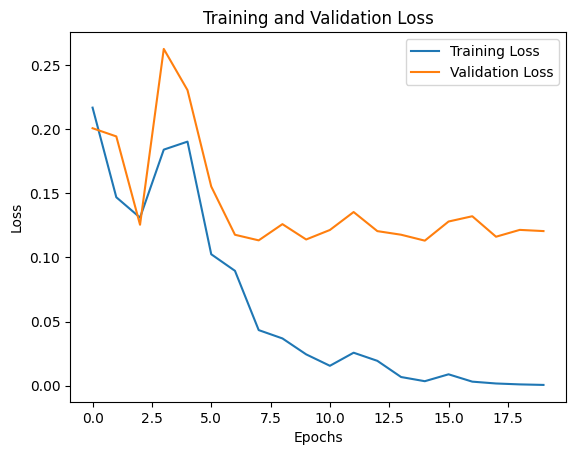

In [25]:
plot_scracth(history)

In [26]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.1895
Validation Loss: 0.1378
--------------------
Epoch 2/20                              
Training Loss: 0.0929
Validation Loss: 0.0940
--------------------
Epoch 3/20                              
Training Loss: 0.0533
Validation Loss: 0.0829
--------------------
Epoch 4/20                              
Training Loss: 0.0373
Validation Loss: 0.0736
--------------------
Epoch 5/20                              
Training Loss: 0.0280
Validation Loss: 0.0699
--------------------
Epoch 6/20                              
Training Loss: 0.0218
Validation Loss: 0.0676
--------------------
Epoch 7/20                              
Training Loss: 0.0169
Validation Loss: 0.0670
--------------------
Epoch 8/20                              
Training Loss: 0.0135
Validation Loss: 0.0669
--------------------
Epoch 9/20                              
Training Loss: 0.0110
Validation Loss: 0.0676
--------------------
Epoch 10/20                 

In [27]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0561, Accuracy: 0.8350


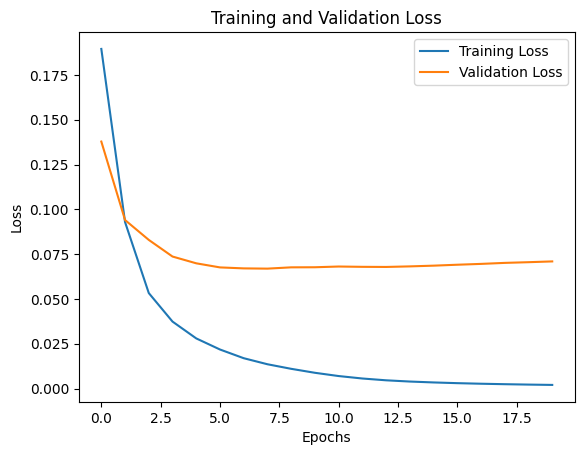

In [28]:
plot_scracth(history)

In [29]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2278
Validation Loss: 0.2019
--------------------
Epoch 2/20                              
Training Loss: 0.2134
Validation Loss: 0.3460
--------------------
Epoch 3/20                              
Training Loss: 0.3174
Validation Loss: 0.5150
--------------------
Epoch 4/20                              
Training Loss: 0.8273
Validation Loss: 0.9951
--------------------
Epoch 5/20                              
Training Loss: 1.5958
Validation Loss: 1.5960
--------------------
Epoch 6/20                              
Training Loss: 1.6856
Validation Loss: 1.9190
--------------------
[######--------------] 30.00%

c:\Users\Zaki\.0\1.KULIAH\Semester6\ML\Tubes\IF3270_FFNN\src\tensor.py:152: RuntimeWarning: overflow encountered in multiply
  res = Tensor(self.data * other.data, [self, other], "*")
C:\Users\Zaki\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Zaki\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Epoch 7/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 8/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 9/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 10/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 11/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 12/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 13/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 14/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 15/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 16/20                              
Training Loss: nan
Validation Loss

In [30]:
loss, metric = model.evaluate(X_test, y_test)

Loss: nan, Accuracy: 0.1100


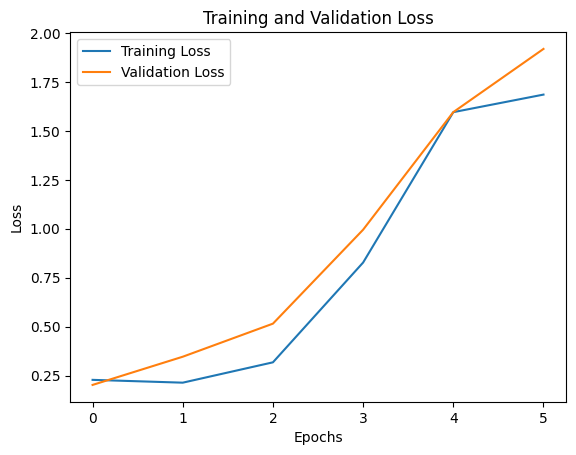

In [31]:
plot_scracth(history)

In [32]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=64, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2532
Validation Loss: 0.2513
--------------------
Epoch 2/20                              
Training Loss: 0.2194
Validation Loss: 0.1595
--------------------
Epoch 3/20                              
Training Loss: 0.2325
Validation Loss: 0.1702
--------------------
Epoch 4/20                              
Training Loss: 0.2511
Validation Loss: 0.2412
--------------------
Epoch 5/20                              
Training Loss: 0.2484
Validation Loss: 0.3918
--------------------
Epoch 6/20                              
Training Loss: 0.1795
Validation Loss: 0.2737
--------------------
Epoch 7/20                              
Training Loss: 0.1393
Validation Loss: 0.2233
--------------------
Epoch 8/20                              
Training Loss: 0.0727
Validation Loss: 0.1156
--------------------
Epoch 9/20                              
Training Loss: 0.0585
Validation Loss: 0.1276
--------------------
Epoch 10/20                 

In [33]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.1266, Accuracy: 0.8300


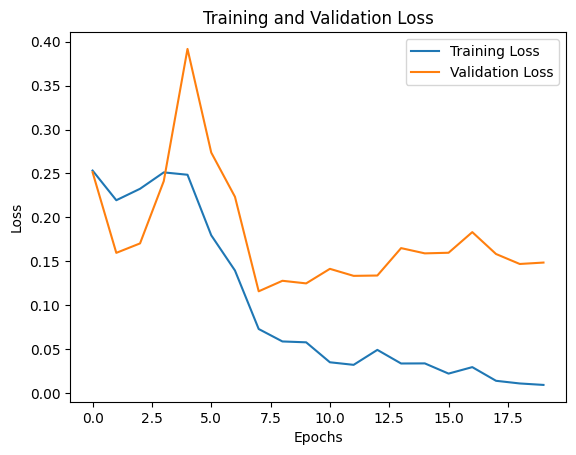

In [34]:
plot_scracth(history)

In [35]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=128, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2209
Validation Loss: 0.2003
--------------------
Epoch 2/20                              
Training Loss: 0.2027
Validation Loss: 0.3498
--------------------
Epoch 3/20                              
Training Loss: 0.2714
Validation Loss: 0.3076
--------------------
Epoch 4/20                              
Training Loss: 0.6717
Validation Loss: 0.6756
--------------------
Epoch 5/20                              
Training Loss: 0.7501
Validation Loss: 0.5606
--------------------
Epoch 6/20                              
Training Loss: 0.9440
Validation Loss: 1.0479
--------------------
Epoch 7/20                              
Training Loss: 0.9144
Validation Loss: 0.7059
--------------------
Epoch 8/20                              
Training Loss: 0.4685
Validation Loss: 0.6101
--------------------
Epoch 9/20                              
Training Loss: 0.4370
Validation Loss: 0.4835
--------------------
Epoch 10/20                 

In [36]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.3951, Accuracy: 0.7700


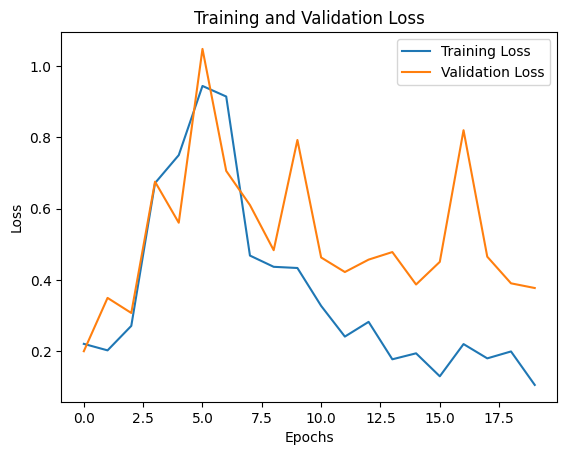

In [37]:
plot_scracth(history)

In [38]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2202
Validation Loss: 0.1747
--------------------
Epoch 2/20                              
Training Loss: 0.1739
Validation Loss: 0.1703
--------------------
Epoch 3/20                              
Training Loss: 0.1402
Validation Loss: 0.1292
--------------------
Epoch 4/20                              
Training Loss: 0.1010
Validation Loss: 0.1729
--------------------
Epoch 5/20                              
Training Loss: 0.0924
Validation Loss: 0.1240
--------------------
Epoch 6/20                              
Training Loss: 0.0665
Validation Loss: 0.0864
--------------------
Epoch 7/20                              
Training Loss: 0.0413
Validation Loss: 0.0846
--------------------
Epoch 8/20                              
Training Loss: 0.0274
Validation Loss: 0.0833
--------------------
Epoch 9/20                              
Training Loss: 0.0242
Validation Loss: 0.1142
--------------------
Epoch 10/20                 

In [39]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0879, Accuracy: 0.8200


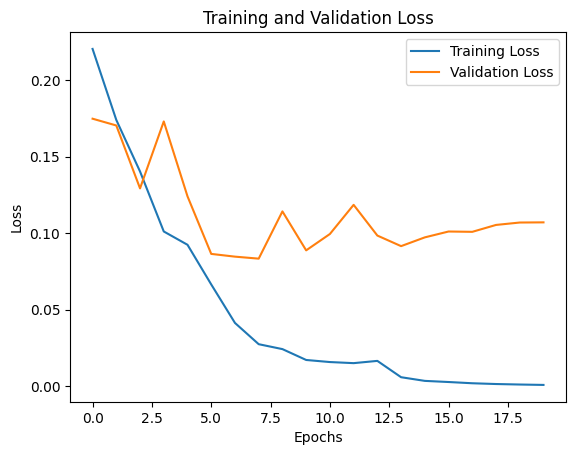

In [40]:
plot_scracth(history)

### **Pengaruh Fungsi Aktivasi**

In [41]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="relu", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.1870
Validation Loss: 0.0000
--------------------
Epoch 2/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 3/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 4/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 5/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 6/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 7/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 8/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 9/20                              
Training Loss: 0.0000
Validation Loss: 0.0000
--------------------
Epoch 10/20                 

In [42]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0000, Accuracy: 0.1100


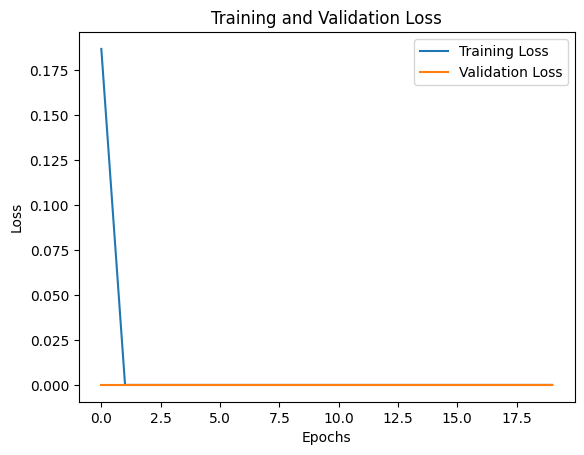

In [43]:
plot_scracth(history)

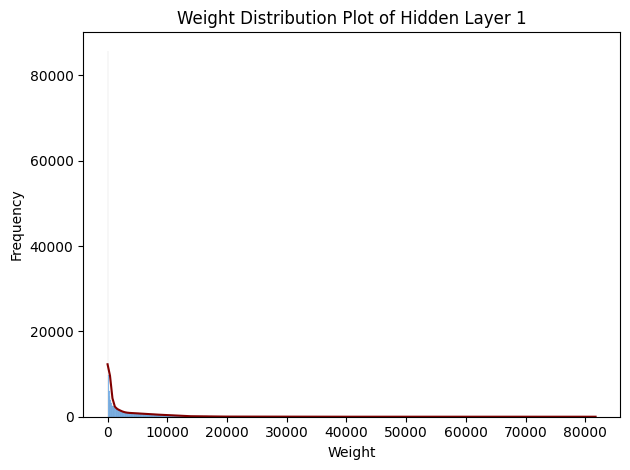

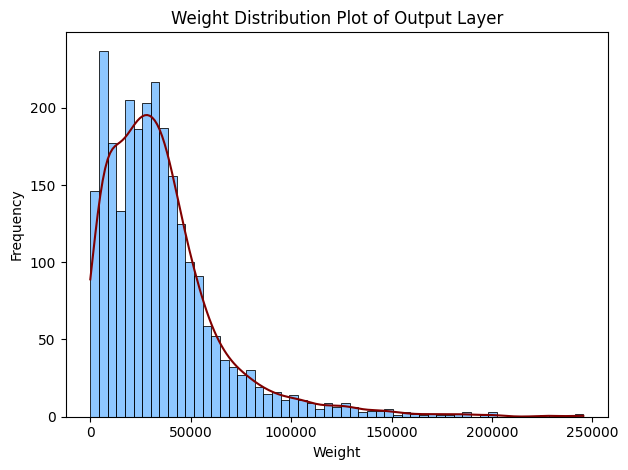

In [44]:
model.plot_weights([1, 2])

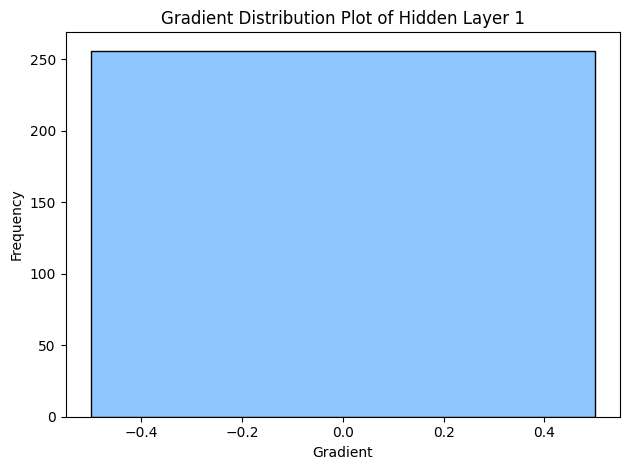

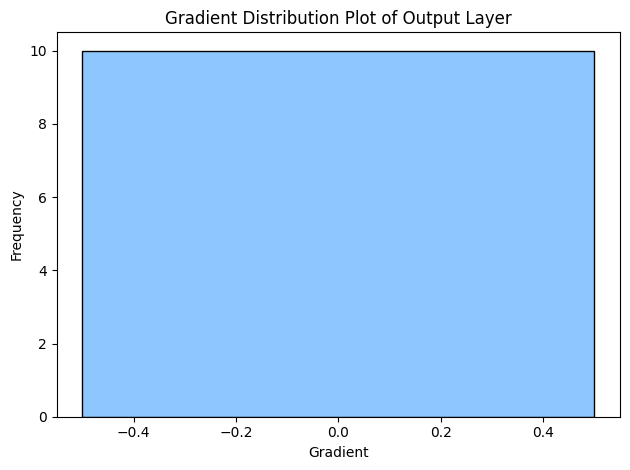

In [45]:
model.plot_gradients([1, 2])

In [46]:
model = FFNN([
    Dense(neuron_size=256, activation="linear", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="linear", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 1.7949
Validation Loss: 1.7408
--------------------
[#-------------------] 5.00%

c:\Users\Zaki\.0\1.KULIAH\Semester6\ML\Tubes\IF3270_FFNN\src\tensor.py:152: RuntimeWarning: overflow encountered in multiply
  res = Tensor(self.data * other.data, [self, other], "*")
C:\Users\Zaki\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Epoch 2/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 3/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 4/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 5/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 6/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 7/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 8/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 9/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 10/20                              
Training Loss: nan
Validation Loss: nan
--------------------
Epoch 11/20                              
Training Loss: nan
Validation Loss: nan

In [47]:
loss, metric = model.evaluate(X_test, y_test)

Loss: nan, Accuracy: 0.1100


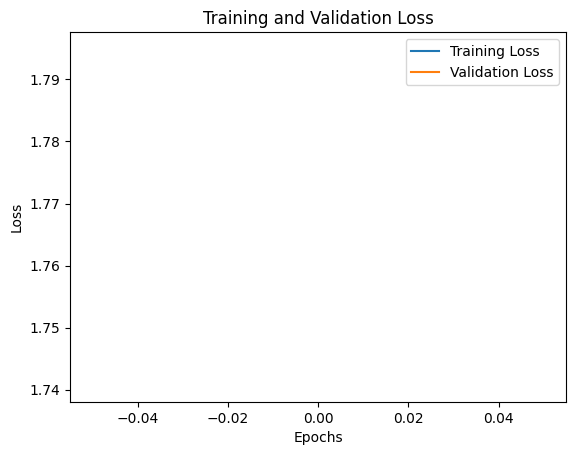

In [48]:
plot_scracth(history)

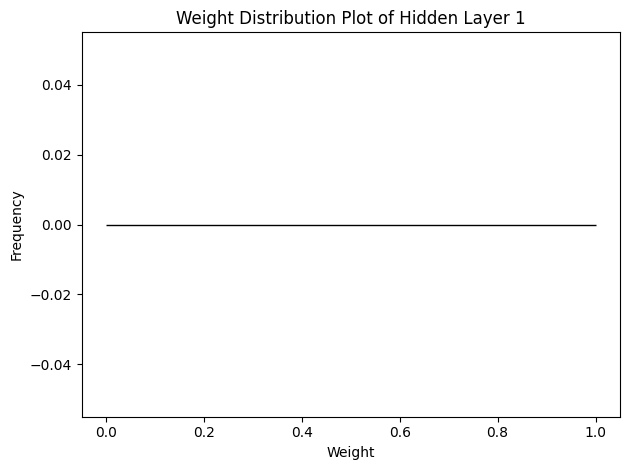

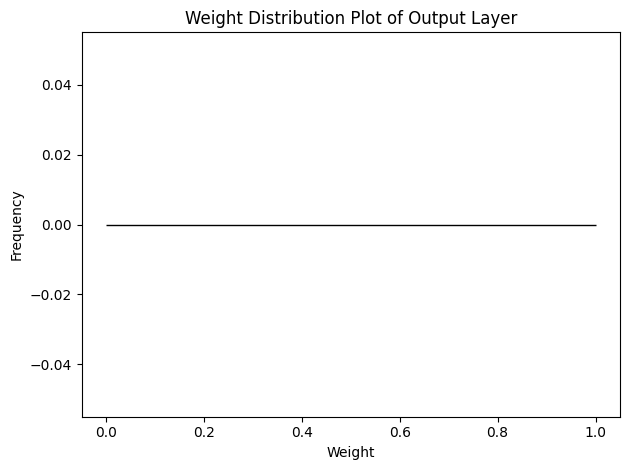

In [49]:
model.plot_weights([1, 2])

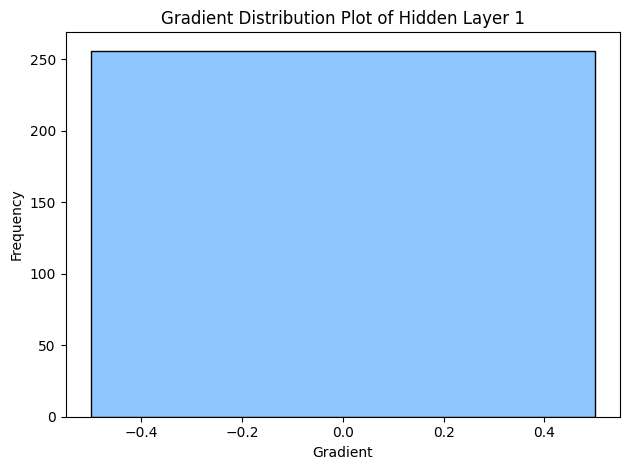

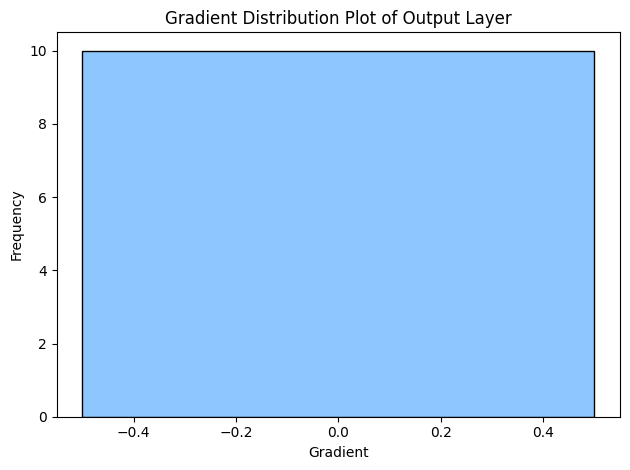

In [50]:
model.plot_gradients([1, 2])

In [51]:
model = FFNN([
    Dense(neuron_size=256, activation="sigmoid", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="sigmoid", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.0472
Validation Loss: 0.0291
--------------------
Epoch 2/20                              
Training Loss: 0.0232
Validation Loss: 0.0173
--------------------
Epoch 3/20                              
Training Loss: 0.0149
Validation Loss: 0.0120
--------------------
Epoch 4/20                              
Training Loss: 0.0108
Validation Loss: 0.0092
--------------------
Epoch 5/20                              
Training Loss: 0.0084
Validation Loss: 0.0074
--------------------
Epoch 6/20                              
Training Loss: 0.0069
Validation Loss: 0.0061
--------------------
Epoch 7/20                              
Training Loss: 0.0058
Validation Loss: 0.0052
--------------------
Epoch 8/20                              
Training Loss: 0.0050
Validation Loss: 0.0046
--------------------
Epoch 9/20                              
Training Loss: 0.0044
Validation Loss: 0.0040
--------------------
Epoch 10/20                 

In [52]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0018, Accuracy: 0.1700


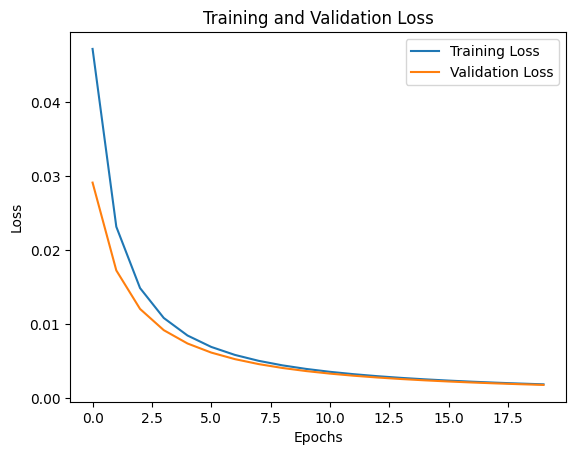

In [53]:
plot_scracth(history)

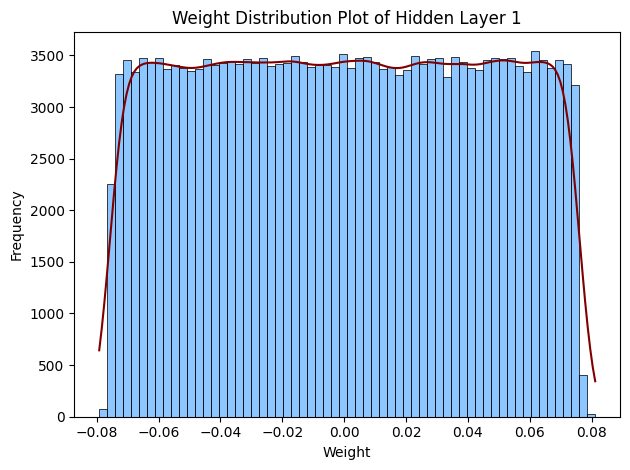

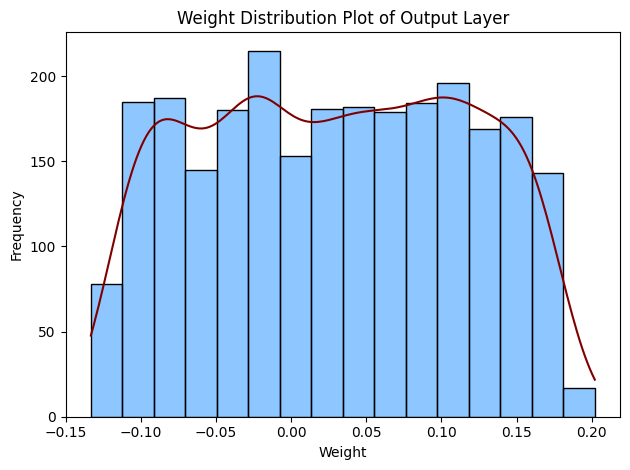

In [54]:
model.plot_weights([1, 2])

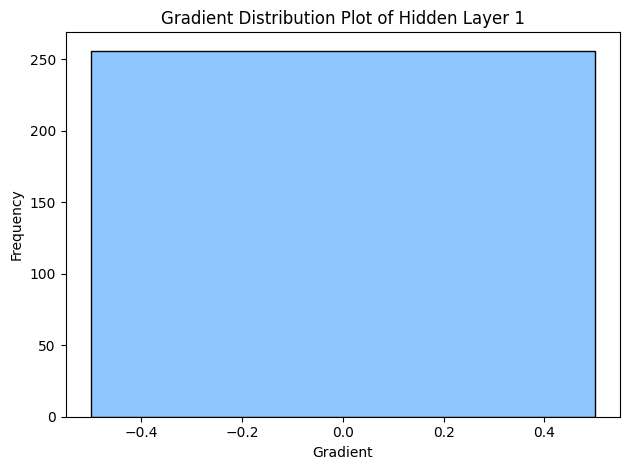

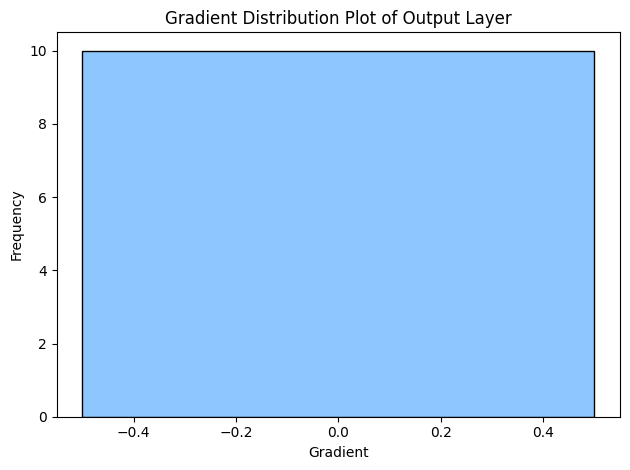

In [55]:
model.plot_gradients([1, 2])

In [56]:
model = FFNN([
    Dense(neuron_size=256, activation="tanh", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="tanh", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

c:\Users\Zaki\.0\1.KULIAH\Semester6\ML\Tubes\IF3270_FFNN\src\activation_function.py:59: RuntimeWarning: overflow encountered in exp
  return np.power((2 / (np.exp(x) - np.exp(-x))), 2)


Epoch 1/20                              
Training Loss: 0.6140
Validation Loss: 0.4767
--------------------
Epoch 2/20                              
Training Loss: 0.5751
Validation Loss: 0.4767
--------------------
Epoch 3/20                              
Training Loss: 0.5751
Validation Loss: 0.4767
--------------------
Epoch 4/20                              
Training Loss: 0.5751
Validation Loss: 0.4767
--------------------
Epoch 5/20                              
Training Loss: 0.5751
Validation Loss: 0.4767
--------------------
Epoch 6/20                              
Training Loss: 0.5751
Validation Loss: 0.4767
--------------------
Epoch 7/20                              
Training Loss: 0.5751
Validation Loss: 0.4766
--------------------
Epoch 8/20                              
Training Loss: 0.5751
Validation Loss: 0.4766
--------------------
Epoch 9/20                              
Training Loss: 0.5751
Validation Loss: 0.4766
--------------------
Epoch 10/20                 

In [57]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.5907, Accuracy: 0.0900


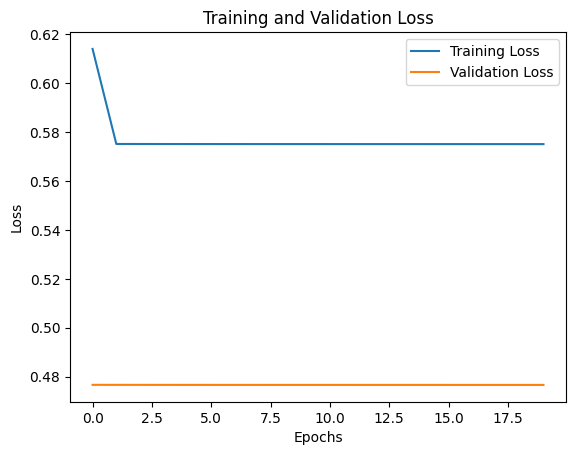

In [58]:
plot_scracth(history)

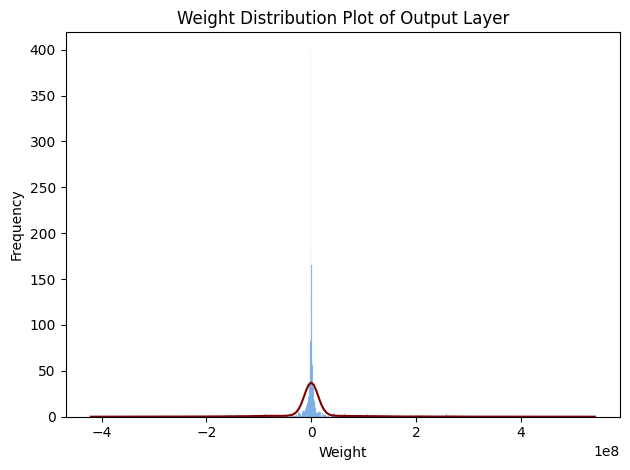

In [65]:
model.plot_weights([2])

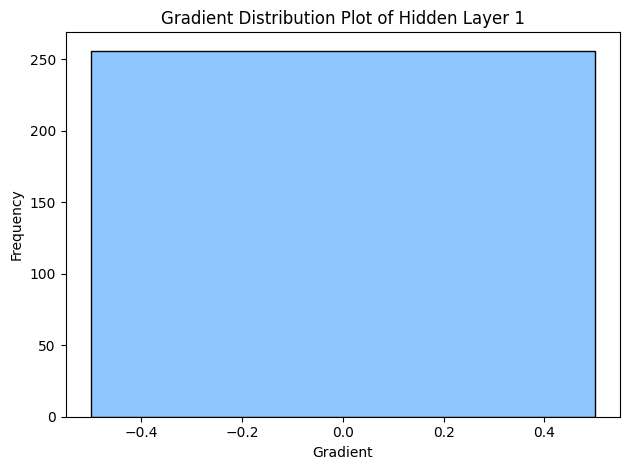

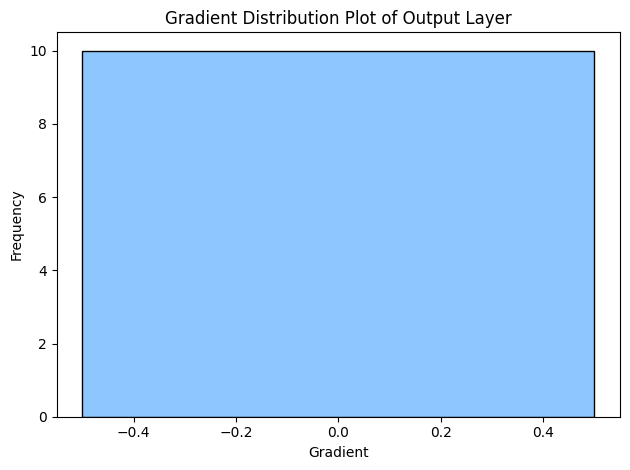

In [62]:
model.plot_gradients([1, 2])

In [8]:
model = FFNN([
    Dense(neuron_size=256, activation="gelu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="gelu", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.4062
Validation Loss: 0.2901
--------------------
Epoch 2/20                              
Training Loss: 0.3419
Validation Loss: 0.2901
--------------------
Epoch 3/20                              
Training Loss: 0.3419
Validation Loss: 0.2901
--------------------
Epoch 4/20                              
Training Loss: 0.3419
Validation Loss: 0.2901
--------------------
Epoch 5/20                              
Training Loss: 0.3419
Validation Loss: 0.2901
--------------------
Epoch 6/20                              
Training Loss: 0.3419
Validation Loss: 0.2901
--------------------
Epoch 7/20                              
Training Loss: 0.3419
Validation Loss: 0.2901
--------------------
Epoch 8/20                              
Training Loss: 0.2953
Validation Loss: 0.1865
--------------------
Epoch 9/20                              
Training Loss: 0.1917
Validation Loss: 0.1865
--------------------
Epoch 10/20                 

In [9]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.2383, Accuracy: 0.1100


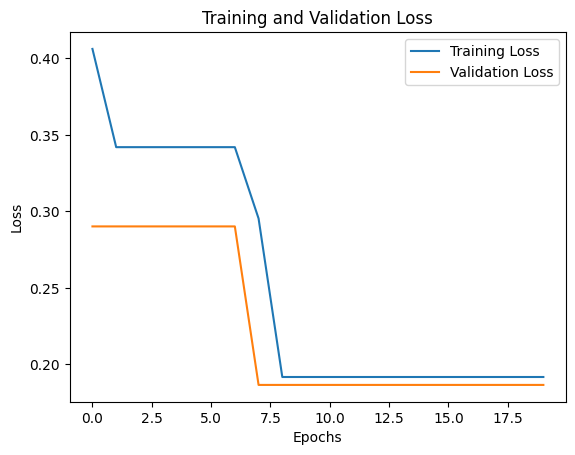

In [10]:
plot_scracth(history)

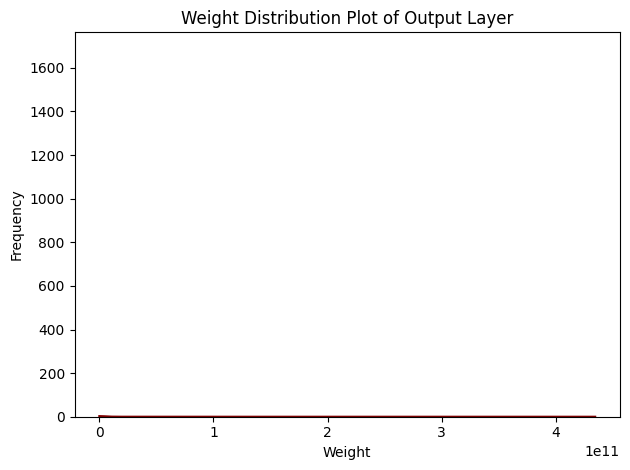

In [11]:
model.plot_weights([2])

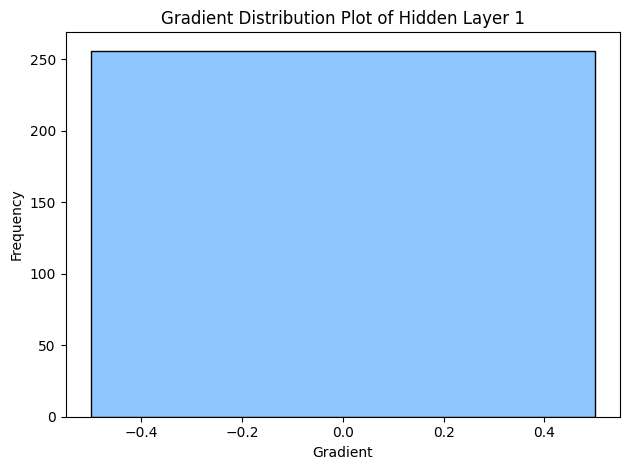

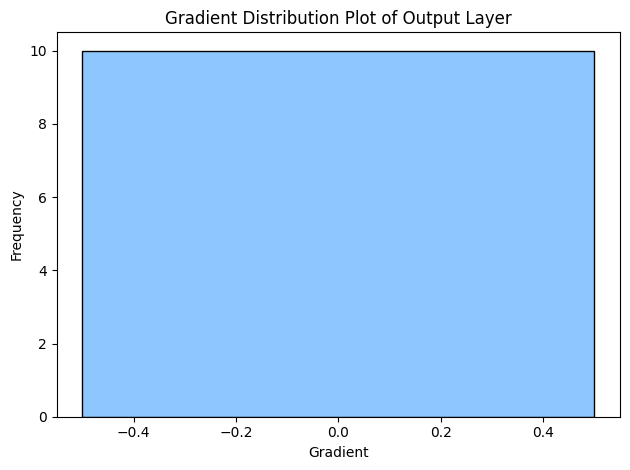

In [13]:
model.plot_gradients([1, 2])

In [14]:
model = FFNN([
    Dense(neuron_size=256, activation="silu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="silu", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

c:\Users\Zaki\.0\1.KULIAH\Semester6\ML\Tubes\IF3270_FFNN\src\activation_function.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1/20                              
Training Loss: 0.5981
Validation Loss: 0.7253
--------------------
Epoch 2/20                              
Training Loss: 0.5803
Validation Loss: 0.7253
--------------------
Epoch 3/20                              
Training Loss: 0.4507
Validation Loss: 0.5388
--------------------
Epoch 4/20                              
Training Loss: 0.3886
Validation Loss: 0.5388
--------------------
Epoch 5/20                              
Training Loss: 0.3886
Validation Loss: 0.5388
--------------------
Epoch 6/20                              
Training Loss: 0.3886
Validation Loss: 0.5388
--------------------
Epoch 7/20                              
Training Loss: 0.3886
Validation Loss: 0.5388
--------------------
Epoch 8/20                              
Training Loss: 0.3886
Validation Loss: 0.5388
--------------------
Epoch 9/20                              
Training Loss: 0.1917
Validation Loss: 0.1865
--------------------
Epoch 10/20                 

In [15]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.2383, Accuracy: 0.1100


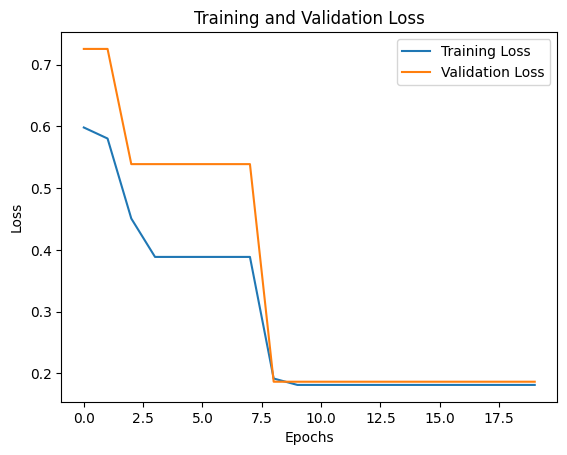

In [16]:
plot_scracth(history)

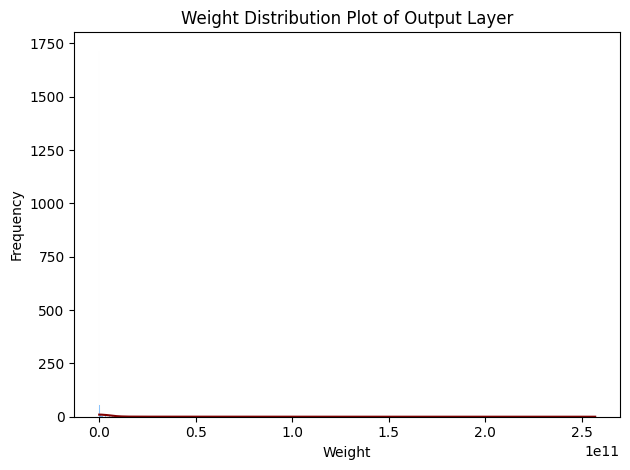

In [17]:
model.plot_weights([2])

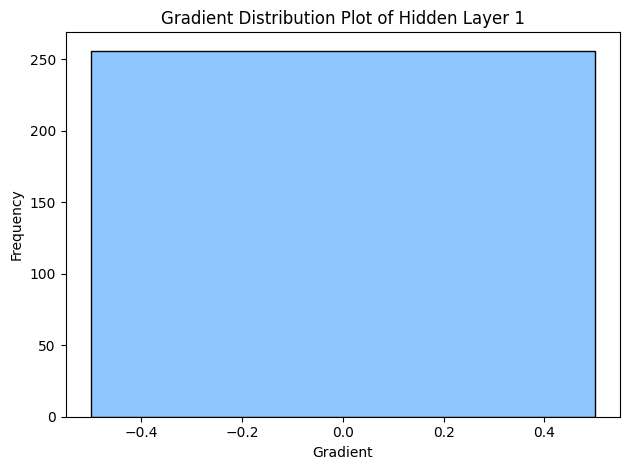

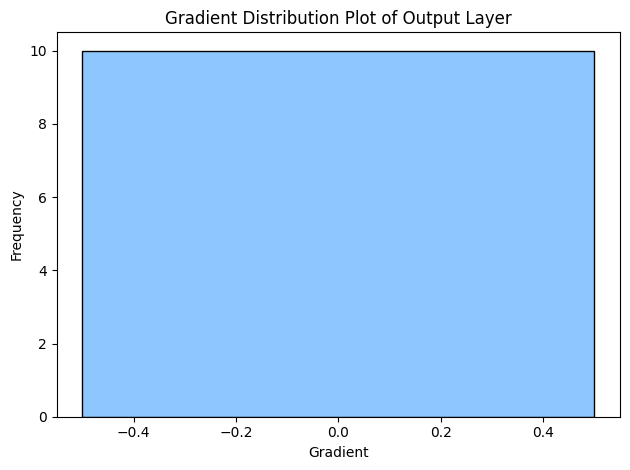

In [18]:
model.plot_gradients([1, 2])

### **Pengaruh Learning Rate**

In [19]:
lr_1 = StochasticGradientDescent(learning_rate=0.001)
lr_2 = StochasticGradientDescent(learning_rate=0.01)
lr_3 = StochasticGradientDescent(learning_rate=0.1)

In [20]:
model_lr_1 = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model_lr_1.compile(optimizer=lr_1, loss="categorical_crossentropy")

history = model_lr_1.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2395
Validation Loss: 0.2212
--------------------
Epoch 2/20                              
Training Loss: 0.2243
Validation Loss: 0.2085
--------------------
Epoch 3/20                              
Training Loss: 0.2092
Validation Loss: 0.1963
--------------------
Epoch 4/20                              
Training Loss: 0.1925
Validation Loss: 0.1800
--------------------
Epoch 5/20                              
Training Loss: 0.1730
Validation Loss: 0.1619
--------------------
Epoch 6/20                              
Training Loss: 0.1524
Validation Loss: 0.1444
--------------------
Epoch 7/20                              
Training Loss: 0.1327
Validation Loss: 0.1292
--------------------
Epoch 8/20                              
Training Loss: 0.1151
Validation Loss: 0.1167
--------------------
Epoch 9/20                              
Training Loss: 0.1004
Validation Loss: 0.1068
--------------------
Epoch 10/20                 

In [21]:
loss, metric = model_lr_1.evaluate(X_test, y_test)

Loss: 0.0633, Accuracy: 0.8150


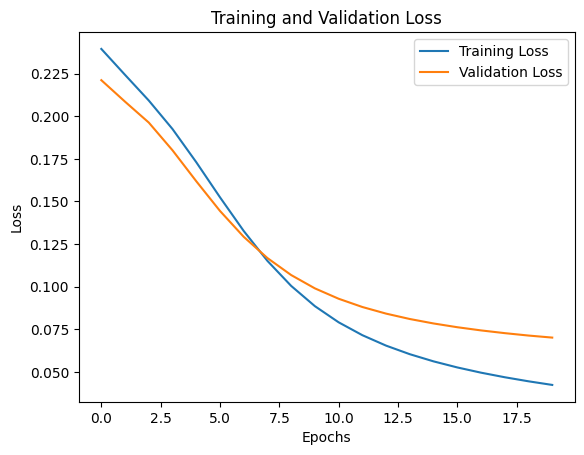

In [22]:
plot_scracth(history)

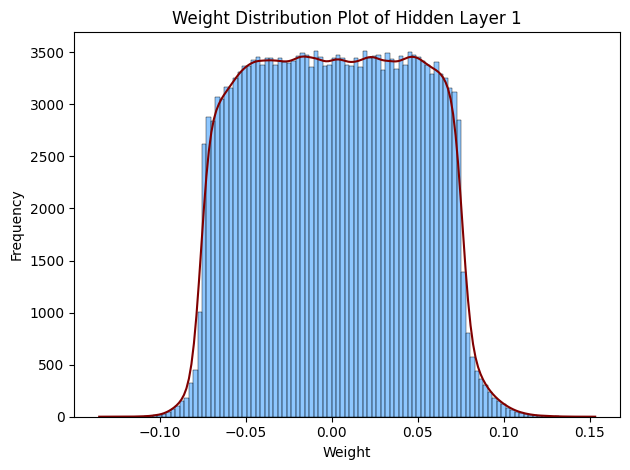

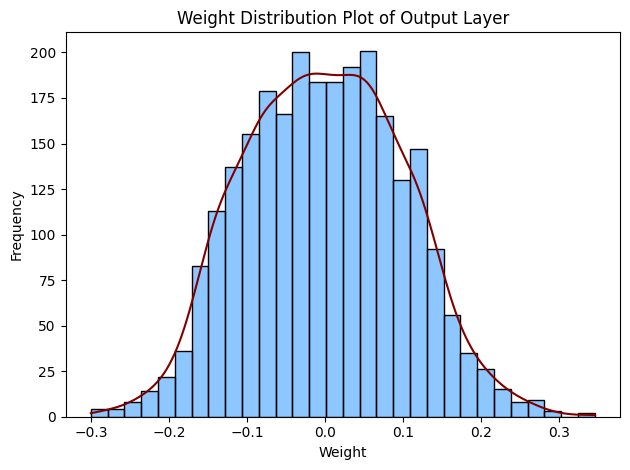

In [23]:
model_lr_1.plot_weights([1, 2])

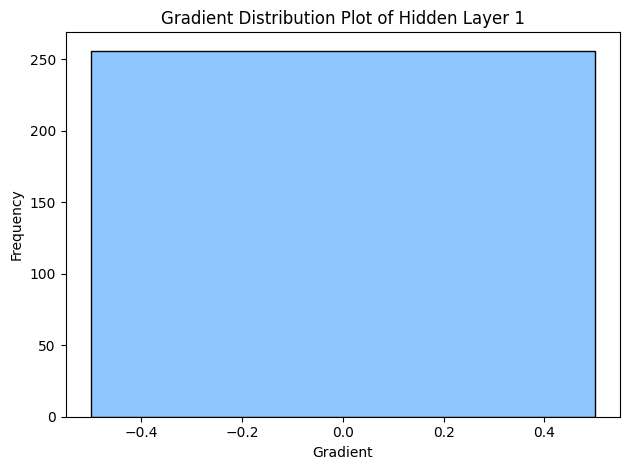

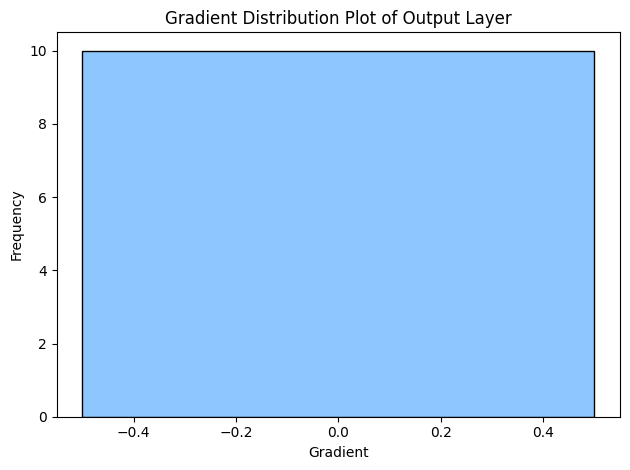

In [24]:
model_lr_1.plot_gradients([1, 2])

In [25]:
model_lr_2 = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model_lr_2.compile(optimizer=lr_2, loss="categorical_crossentropy")

history = model_lr_2.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.1964
Validation Loss: 0.1389
--------------------
Epoch 2/20                              
Training Loss: 0.0990
Validation Loss: 0.0909
--------------------
Epoch 3/20                              
Training Loss: 0.0525
Validation Loss: 0.0760
--------------------
Epoch 4/20                              
Training Loss: 0.0366
Validation Loss: 0.0670
--------------------
Epoch 5/20                              
Training Loss: 0.0276
Validation Loss: 0.0644
--------------------
Epoch 6/20                              
Training Loss: 0.0213
Validation Loss: 0.0627
--------------------
Epoch 7/20                              
Training Loss: 0.0166
Validation Loss: 0.0625
--------------------
Epoch 8/20                              
Training Loss: 0.0130
Validation Loss: 0.0629
--------------------
Epoch 9/20                              
Training Loss: 0.0105
Validation Loss: 0.0633
--------------------
Epoch 10/20                 

In [26]:
loss, metric = model_lr_2.evaluate(X_test, y_test)

Loss: 0.0569, Accuracy: 0.8550


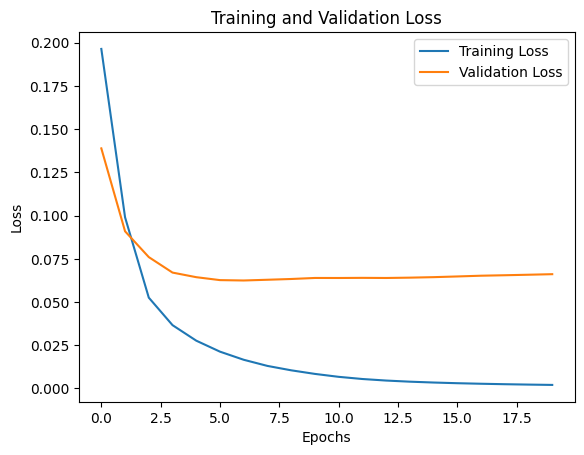

In [27]:
plot_scracth(history)

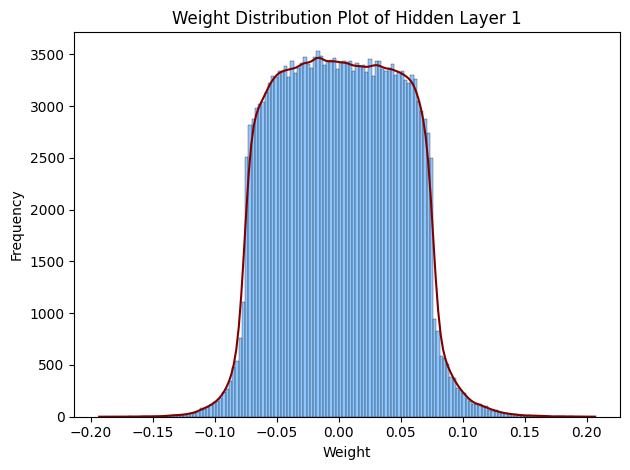

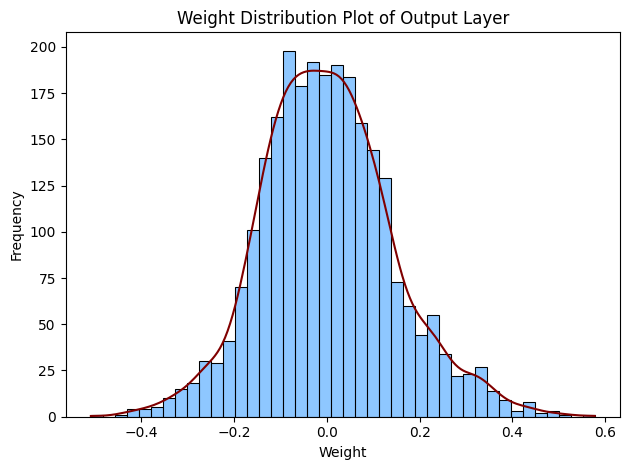

In [28]:
model_lr_2.plot_weights([1, 2])

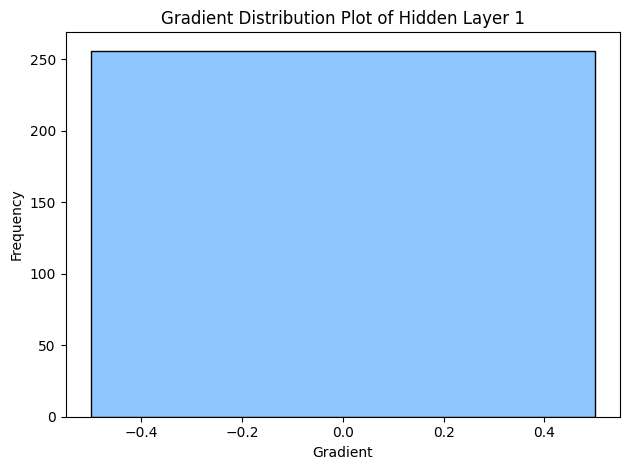

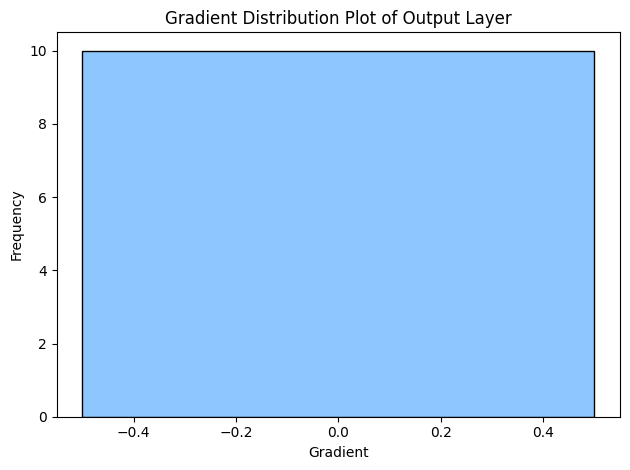

In [90]:
model_lr_2.plot_gradients([1, 2])

In [30]:
model_lr_3 = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model_lr_3.compile(optimizer=lr_3, loss="categorical_crossentropy")

history = model_lr_3.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 1.4758
Validation Loss: 1.3447
--------------------
Epoch 2/20                              
Training Loss: 1.5670
Validation Loss: 1.1931
--------------------
Epoch 3/20                              
Training Loss: 1.0872
Validation Loss: 0.7455
--------------------
Epoch 4/20                              
Training Loss: 0.5509
Validation Loss: 0.5429
--------------------
Epoch 5/20                              
Training Loss: 0.4553
Validation Loss: 0.5281
--------------------
Epoch 6/20                              
Training Loss: 0.3472
Validation Loss: 0.4042
--------------------
Epoch 7/20                              
Training Loss: 0.4354
Validation Loss: 0.3598
--------------------
Epoch 8/20                              
Training Loss: 0.2122
Validation Loss: 0.6026
--------------------
Epoch 9/20                              
Training Loss: 0.2349
Validation Loss: 0.4078
--------------------
Epoch 10/20                 

In [31]:
loss, metric = model_lr_3.evaluate(X_test, y_test)

Loss: 0.4579, Accuracy: 0.7700


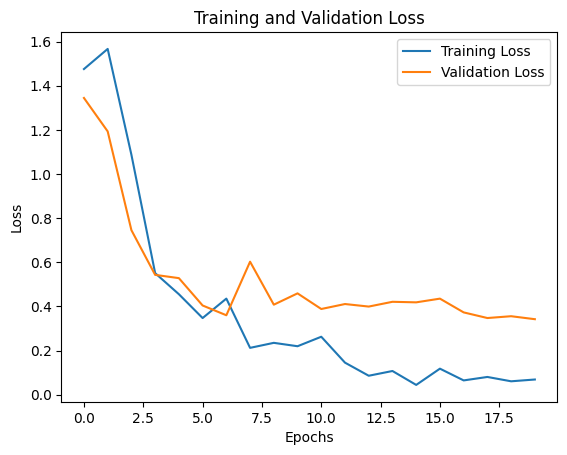

In [32]:
plot_scracth(history)

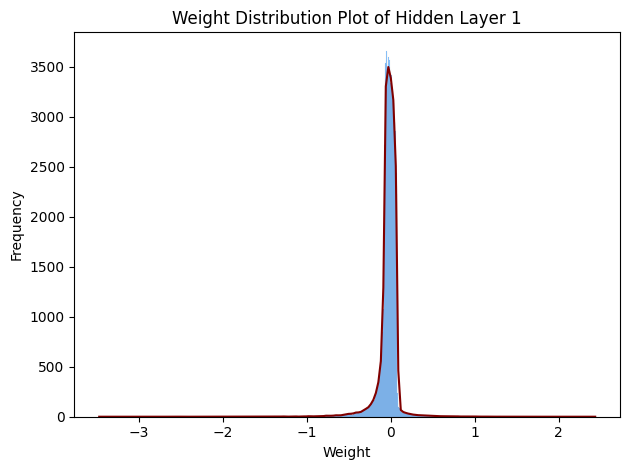

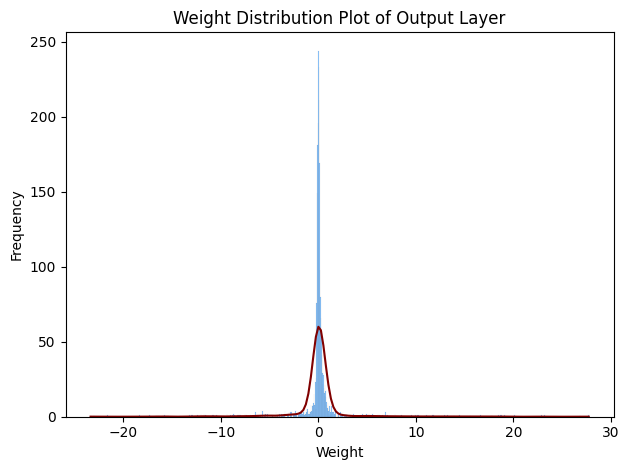

In [33]:
model_lr_3.plot_weights([1, 2])

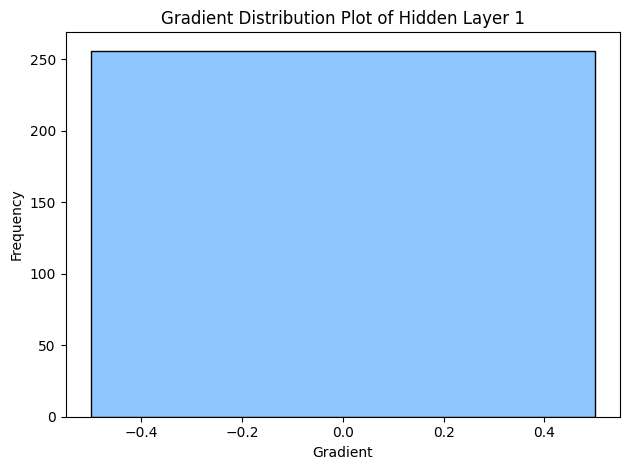

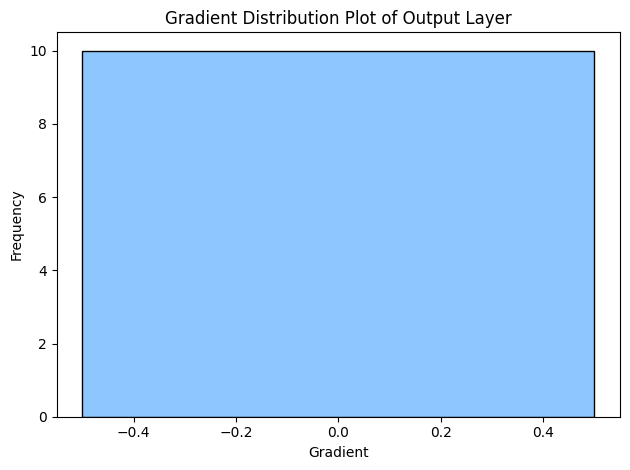

In [34]:
model_lr_3.plot_gradients([1, 2])

### **Pengaruh Inisialisasi Bobot**

In [35]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="zeros", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="zeros")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2303
Validation Loss: 0.2287
--------------------
Epoch 2/20                              
Training Loss: 0.2297
Validation Loss: 0.2279
--------------------
Epoch 3/20                              
Training Loss: 0.2295
Validation Loss: 0.2274
--------------------
Epoch 4/20                              
Training Loss: 0.2293
Validation Loss: 0.2271
--------------------
Epoch 5/20                              
Training Loss: 0.2293
Validation Loss: 0.2269
--------------------
Epoch 6/20                              
Training Loss: 0.2293
Validation Loss: 0.2268
--------------------
Epoch 7/20                              
Training Loss: 0.2293
Validation Loss: 0.2267
--------------------
Epoch 8/20                              
Training Loss: 0.2293
Validation Loss: 0.2267
--------------------
Epoch 9/20                              
Training Loss: 0.2293
Validation Loss: 0.2266
--------------------
Epoch 10/20                 

In [36]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.2311, Accuracy: 0.1100


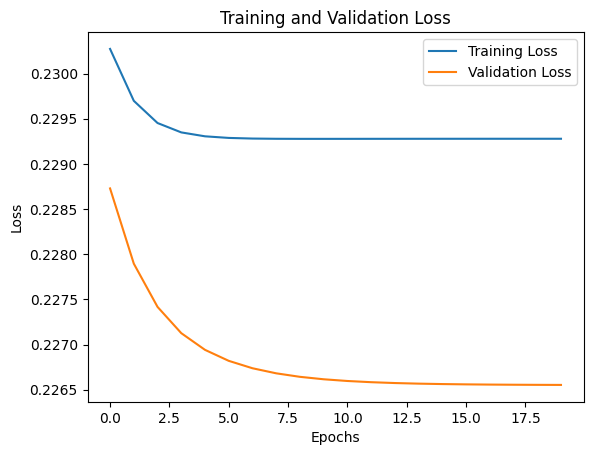

In [37]:
plot_scracth(history)

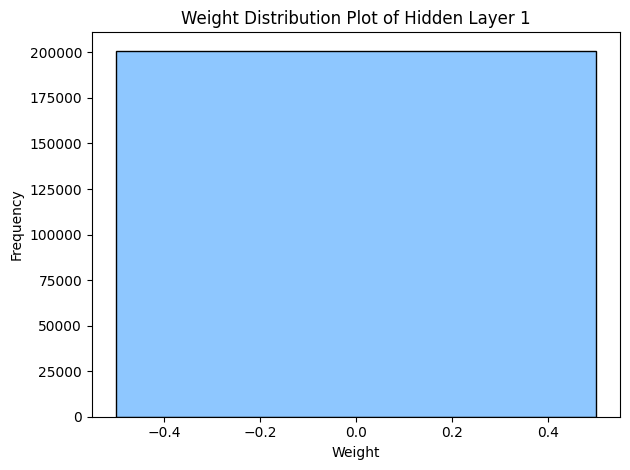

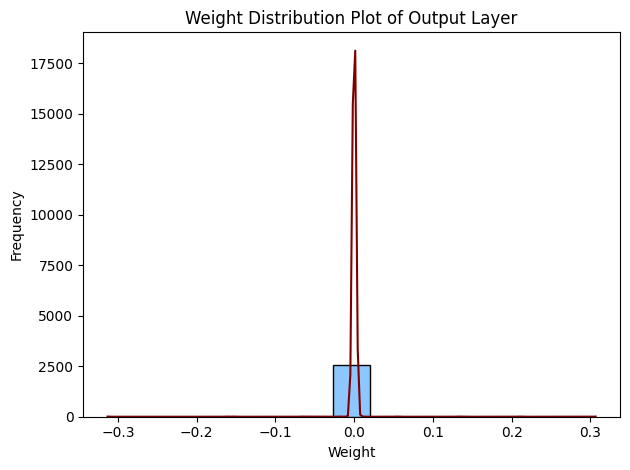

In [38]:
model.plot_weights([1, 2])

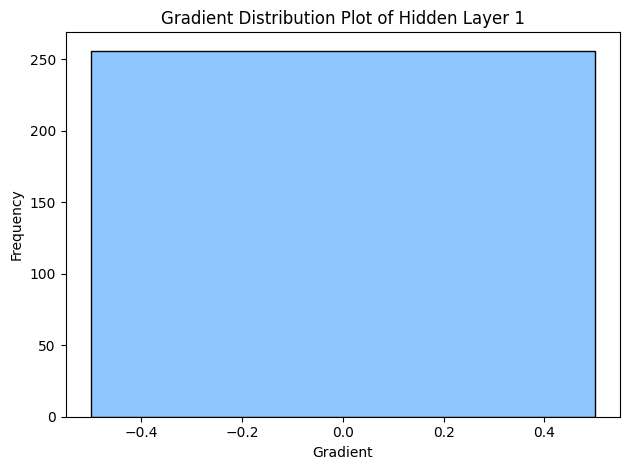

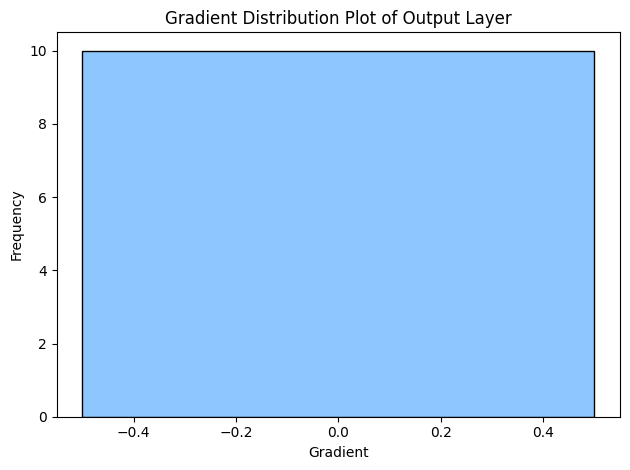

In [39]:
model.plot_gradients([1, 2])

In [40]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="random_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="random_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 1.2122
Validation Loss: 0.7546
--------------------
Epoch 2/20                              
Training Loss: 0.5725
Validation Loss: 0.5272
--------------------
Epoch 3/20                              
Training Loss: 0.4181
Validation Loss: 0.6333
--------------------
Epoch 4/20                              
Training Loss: 0.3142
Validation Loss: 0.3544
--------------------
Epoch 5/20                              
Training Loss: 0.1636
Validation Loss: 0.3995
--------------------
Epoch 6/20                              
Training Loss: 0.0990
Validation Loss: 0.3924
--------------------
Epoch 7/20                              
Training Loss: 0.0826
Validation Loss: 0.3920
--------------------
Epoch 8/20                              
Training Loss: 0.0655
Validation Loss: 0.3594
--------------------
Epoch 9/20                              
Training Loss: 0.0429
Validation Loss: 0.4587
--------------------
Epoch 10/20                 

In [41]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.3157, Accuracy: 0.7850


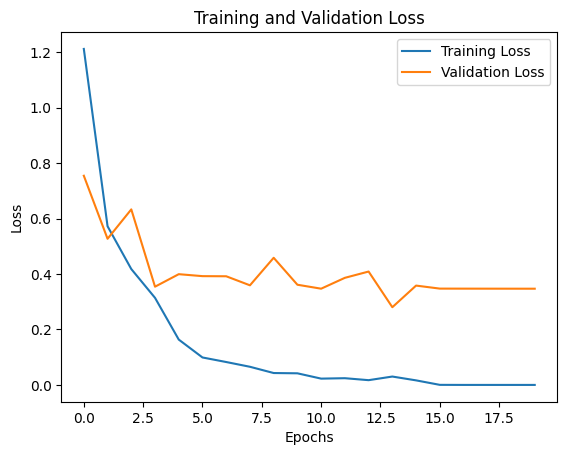

In [42]:
plot_scracth(history)

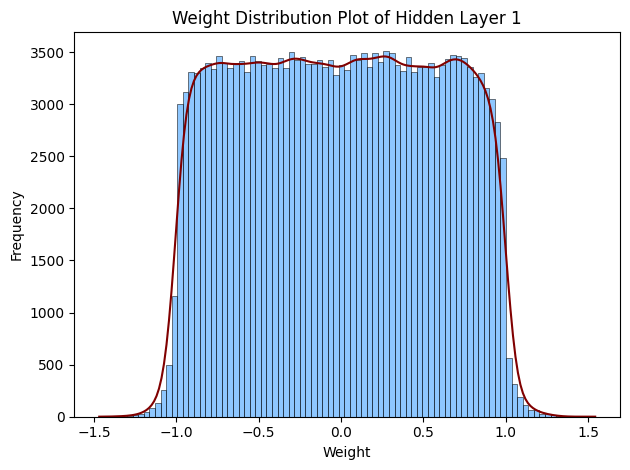

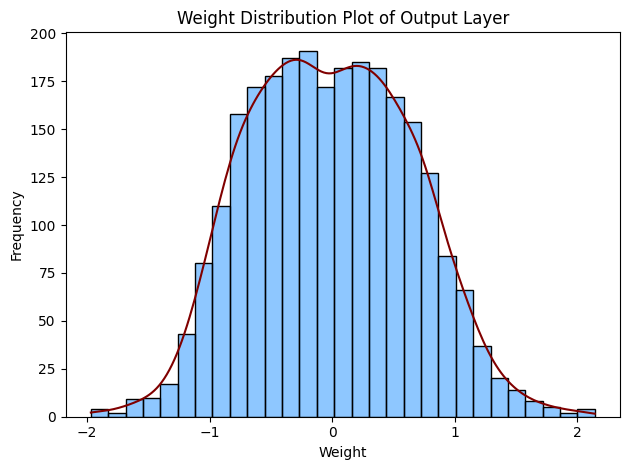

In [43]:
model.plot_weights([1, 2])

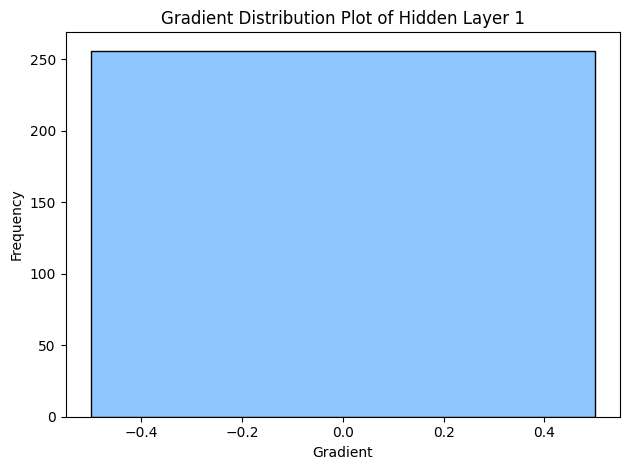

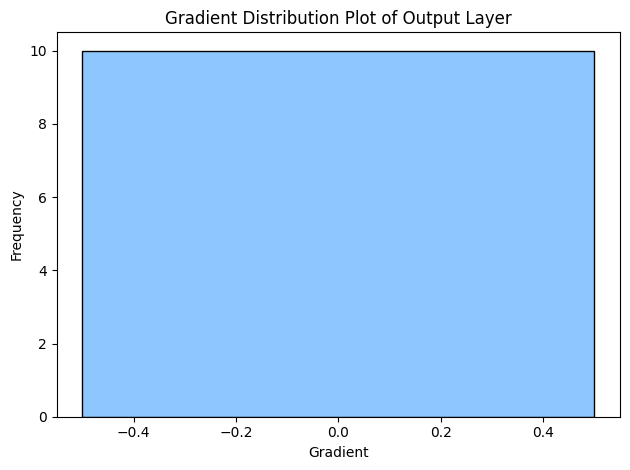

In [44]:
model.plot_gradients([1, 2])

In [45]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="random_normal", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="random_normal")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2807
Validation Loss: 0.2792
--------------------
Epoch 2/20                              
Training Loss: 0.2592
Validation Loss: 0.2602
--------------------
Epoch 3/20                              
Training Loss: 0.2463
Validation Loss: 0.2478
--------------------
Epoch 4/20                              
Training Loss: 0.2385
Validation Loss: 0.2398
--------------------
Epoch 5/20                              
Training Loss: 0.2340
Validation Loss: 0.2349
--------------------
Epoch 6/20                              
Training Loss: 0.2316
Validation Loss: 0.2318
--------------------
Epoch 7/20                              
Training Loss: 0.2304
Validation Loss: 0.2300
--------------------
Epoch 8/20                              
Training Loss: 0.2298
Validation Loss: 0.2288
--------------------
Epoch 9/20                              
Training Loss: 0.2295
Validation Loss: 0.2281
--------------------
Epoch 10/20                 

In [46]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.2311, Accuracy: 0.1100


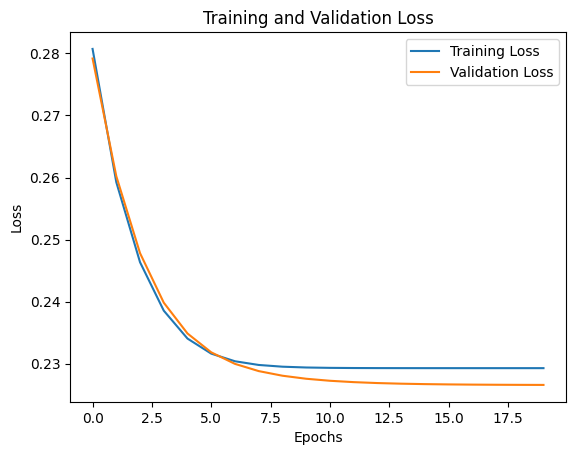

In [47]:
plot_scracth(history)

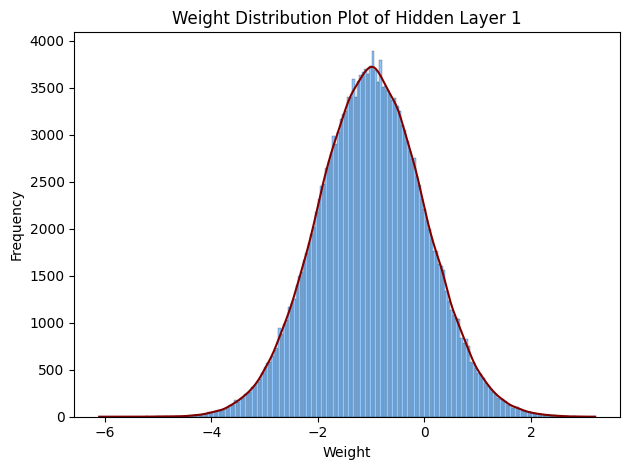

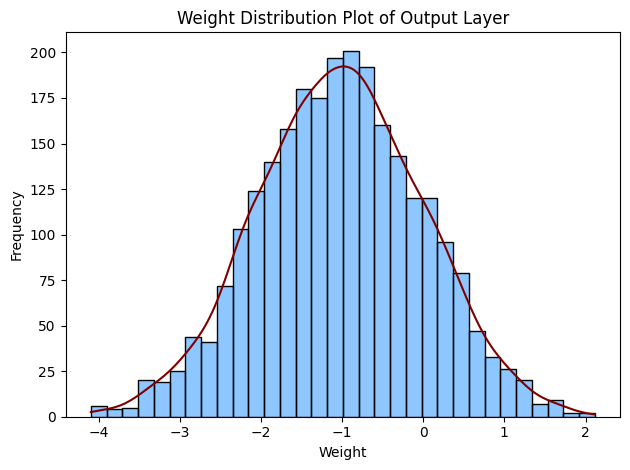

In [48]:
model.plot_weights([1, 2])

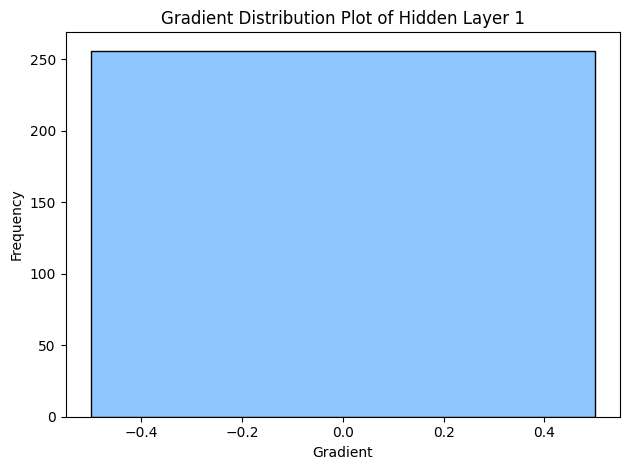

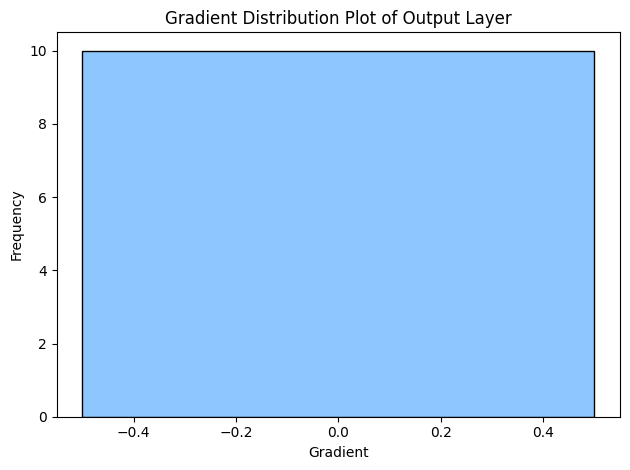

In [49]:
model.plot_gradients([1, 2])

In [50]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.1796
Validation Loss: 0.1357
--------------------
Epoch 2/20                              
Training Loss: 0.0966
Validation Loss: 0.0908
--------------------
Epoch 3/20                              
Training Loss: 0.0518
Validation Loss: 0.0798
--------------------
Epoch 4/20                              
Training Loss: 0.0369
Validation Loss: 0.0662
--------------------
Epoch 5/20                              
Training Loss: 0.0276
Validation Loss: 0.0631
--------------------
Epoch 6/20                              
Training Loss: 0.0212
Validation Loss: 0.0619
--------------------
Epoch 7/20                              
Training Loss: 0.0166
Validation Loss: 0.0616
--------------------
Epoch 8/20                              
Training Loss: 0.0131
Validation Loss: 0.0620
--------------------
Epoch 9/20                              
Training Loss: 0.0103
Validation Loss: 0.0623
--------------------
Epoch 10/20                 

In [51]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0625, Accuracy: 0.8250


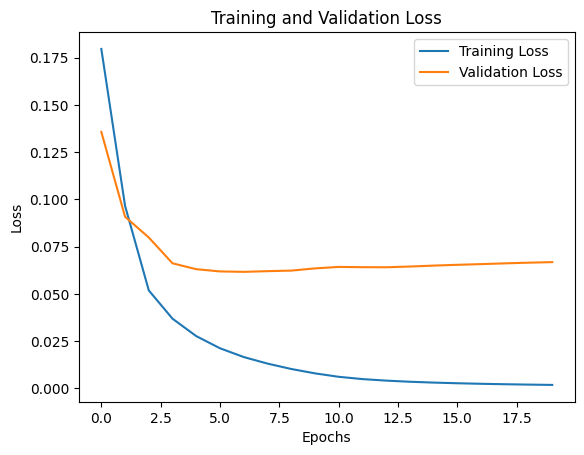

In [52]:
plot_scracth(history)

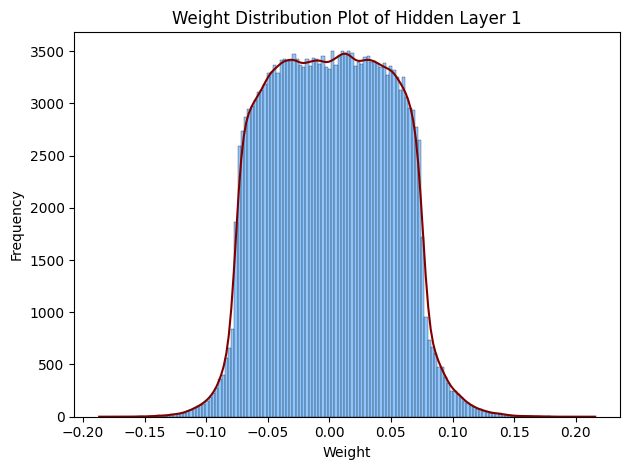

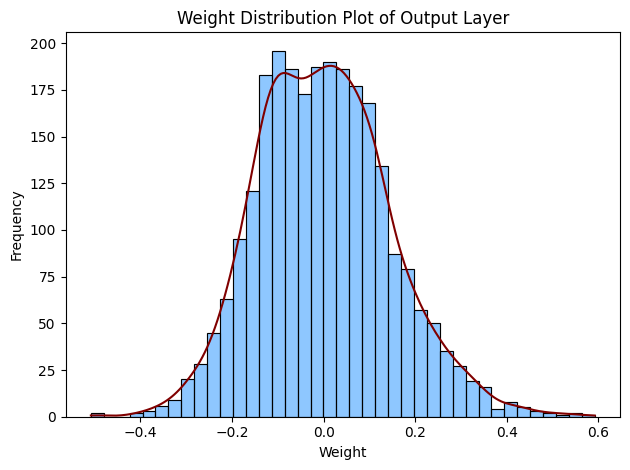

In [53]:
model.plot_weights([1, 2])

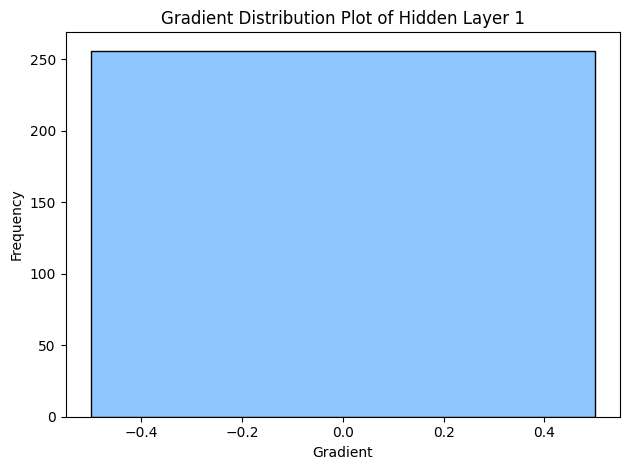

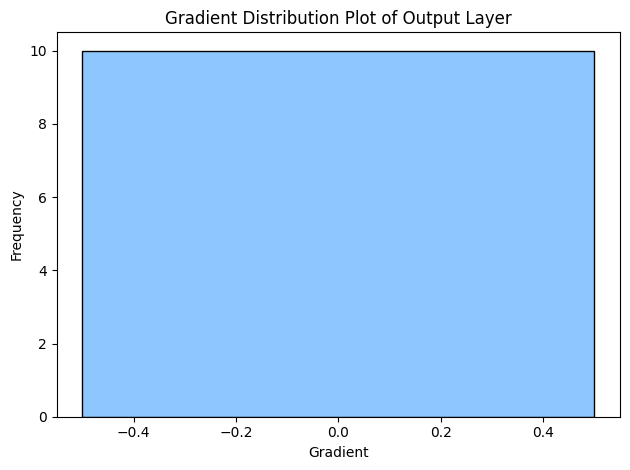

In [54]:
model.plot_gradients([1, 2])

In [55]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="he_normal", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="he_normal")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.1859
Validation Loss: 0.1386
--------------------
Epoch 2/20                              
Training Loss: 0.0978
Validation Loss: 0.0971
--------------------
Epoch 3/20                              
Training Loss: 0.0511
Validation Loss: 0.0831
--------------------
Epoch 4/20                              
Training Loss: 0.0345
Validation Loss: 0.0750
--------------------
Epoch 5/20                              
Training Loss: 0.0260
Validation Loss: 0.0729
--------------------
Epoch 6/20                              
Training Loss: 0.0200
Validation Loss: 0.0720
--------------------
Epoch 7/20                              
Training Loss: 0.0158
Validation Loss: 0.0723
--------------------
Epoch 8/20                              
Training Loss: 0.0124
Validation Loss: 0.0730
--------------------
Epoch 9/20                              
Training Loss: 0.0097
Validation Loss: 0.0731
--------------------
Epoch 10/20                 

In [56]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0533, Accuracy: 0.8450


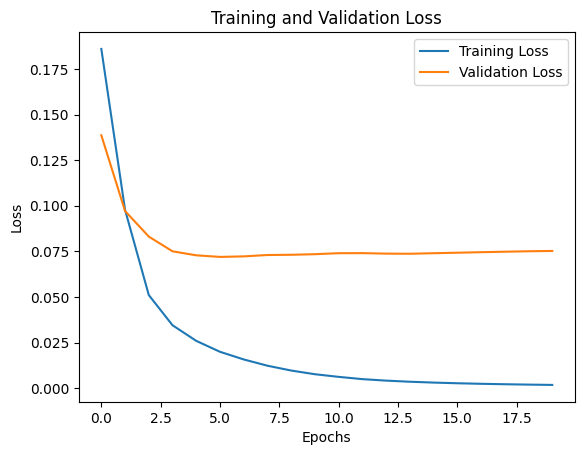

In [57]:
plot_scracth(history)

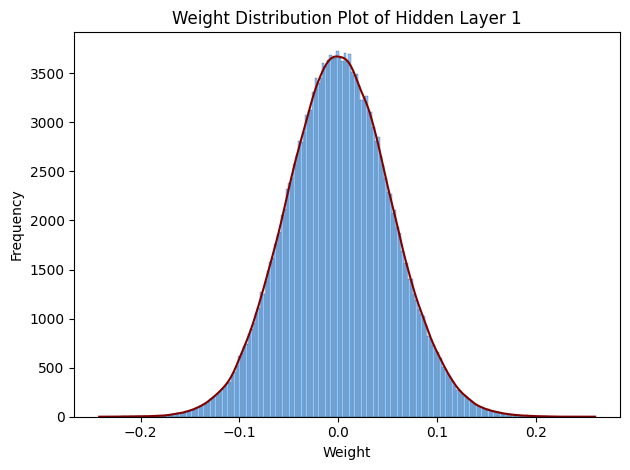

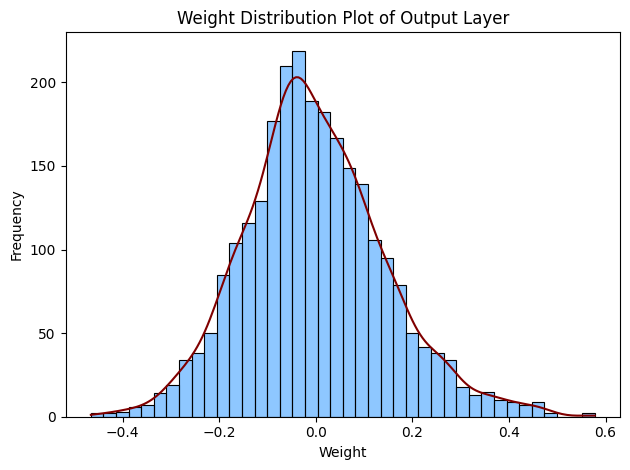

In [58]:
model.plot_weights([1, 2])

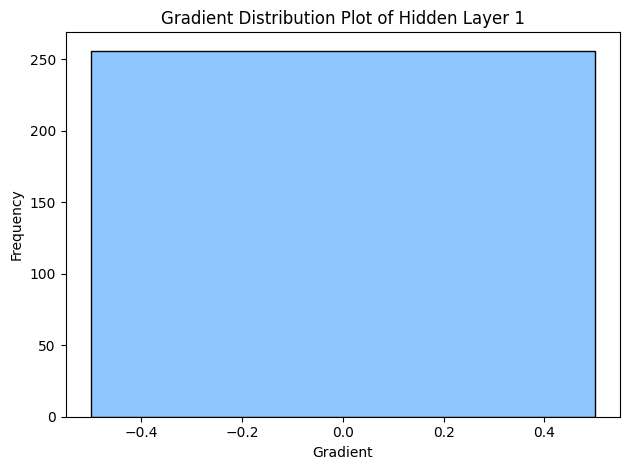

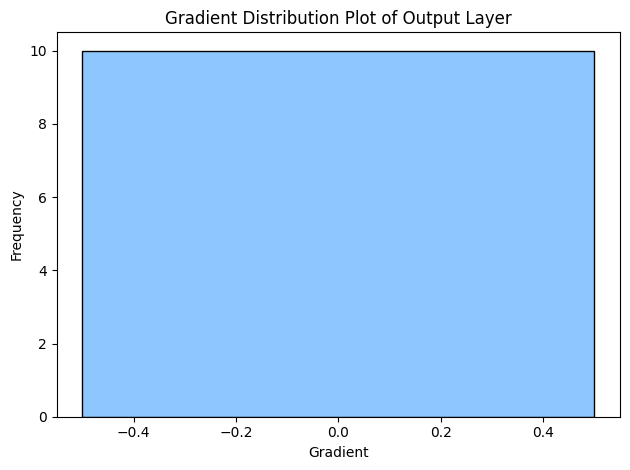

In [59]:
model.plot_gradients([1, 2])

### **Pengaruh Regularisasi**

In [60]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.1945
Validation Loss: 0.1514
--------------------
Epoch 2/20                              
Training Loss: 0.0949
Validation Loss: 0.0953
--------------------
Epoch 3/20                              
Training Loss: 0.0514
Validation Loss: 0.0765
--------------------
Epoch 4/20                              
Training Loss: 0.0355
Validation Loss: 0.0672
--------------------
Epoch 5/20                              
Training Loss: 0.0264
Validation Loss: 0.0663
--------------------
Epoch 6/20                              
Training Loss: 0.0202
Validation Loss: 0.0663
--------------------
Epoch 7/20                              
Training Loss: 0.0155
Validation Loss: 0.0669
--------------------
Epoch 8/20                              
Training Loss: 0.0124
Validation Loss: 0.0675
--------------------
Epoch 9/20                              
Training Loss: 0.0101
Validation Loss: 0.0680
--------------------
Epoch 10/20                 

In [61]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0557, Accuracy: 0.8400


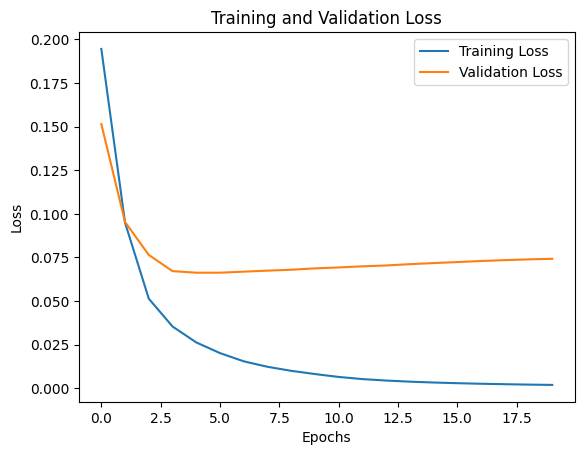

In [62]:
plot_scracth(history)

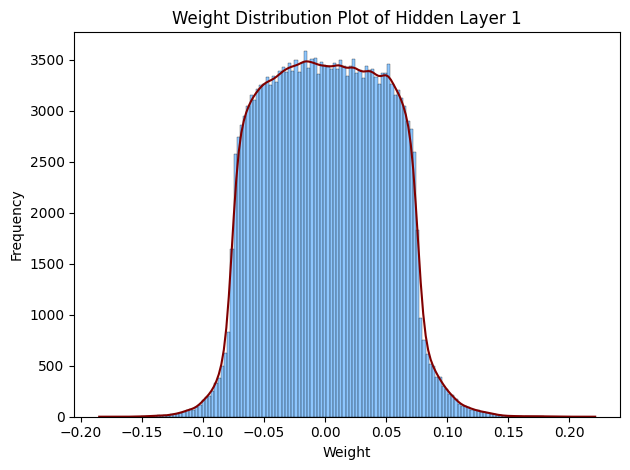

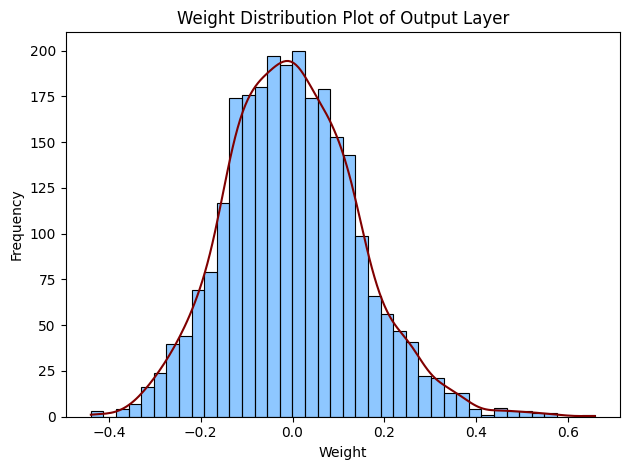

In [63]:
model.plot_weights([1, 2])

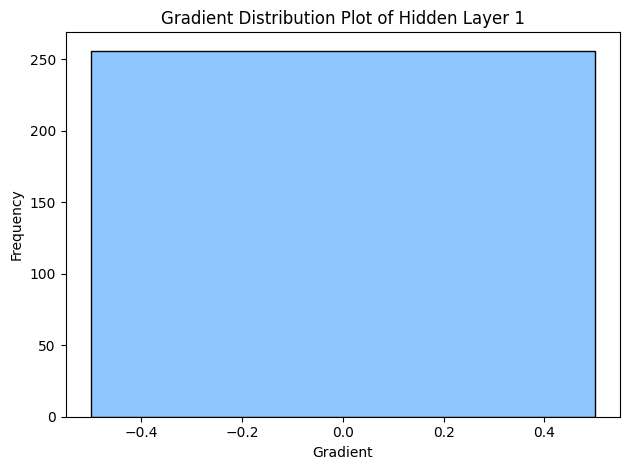

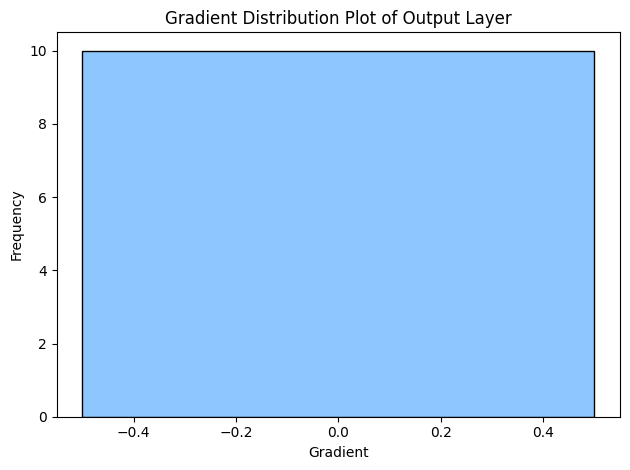

In [64]:
model.plot_gradients([1, 2])

In [65]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", regularization="l1")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 7.3145
Validation Loss: 6.5314
--------------------
Epoch 2/20                              
Training Loss: 5.8702
Validation Loss: 5.2010
--------------------
Epoch 3/20                              
Training Loss: 4.6225
Validation Loss: 4.0552
--------------------
Epoch 4/20                              
Training Loss: 3.5560
Validation Loss: 3.0843
--------------------
Epoch 5/20                              
Training Loss: 2.6674
Validation Loss: 2.2889
--------------------
Epoch 6/20                              
Training Loss: 1.9544
Validation Loss: 1.6659
--------------------
Epoch 7/20                              
Training Loss: 1.4136
Validation Loss: 1.2119
--------------------
Epoch 8/20                              
Training Loss: 1.0370
Validation Loss: 0.9148
--------------------
Epoch 9/20                              
Training Loss: 0.8085
Validation Loss: 0.7573
--------------------
Epoch 10/20                 

In [66]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.5315, Accuracy: 0.7550


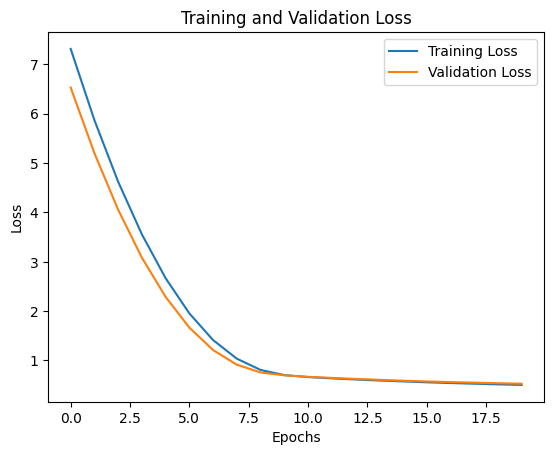

In [67]:
plot_scracth(history)

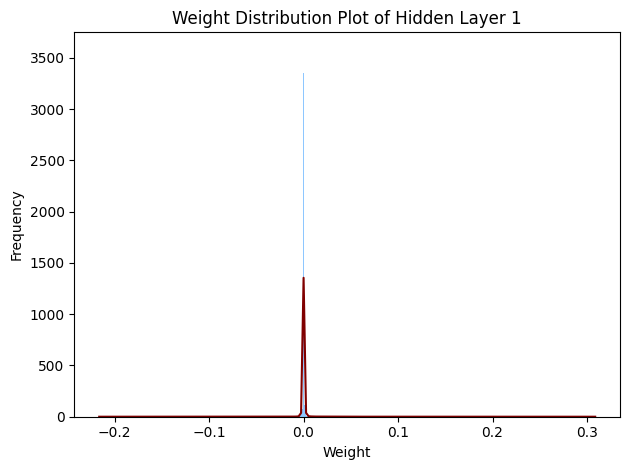

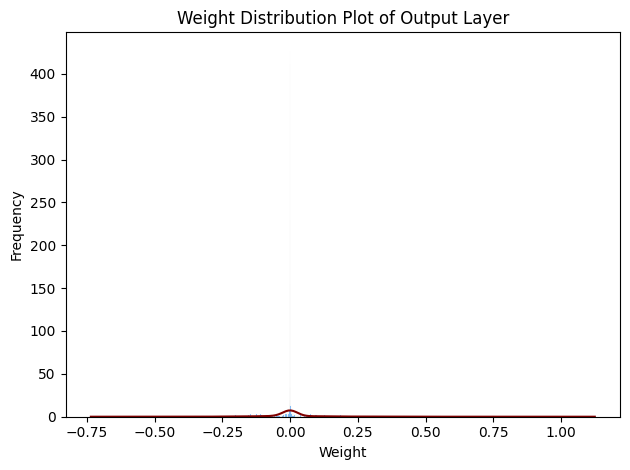

In [68]:
model.plot_weights([1, 2])

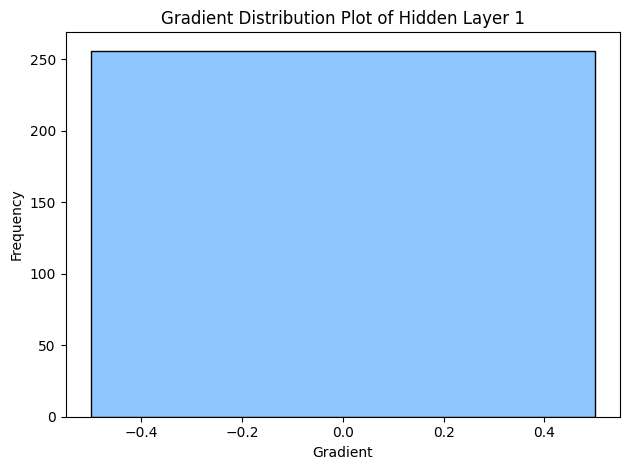

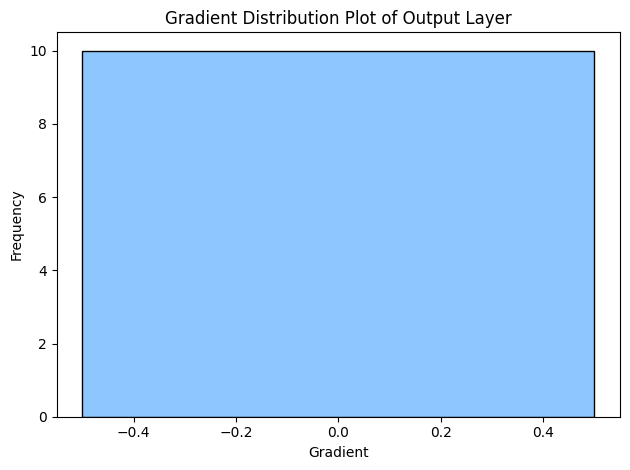

In [69]:
model.plot_gradients([1, 2])

In [91]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", regularization="l2")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.5984
Validation Loss: 0.5584
--------------------
Epoch 2/20                              
Training Loss: 0.5018
Validation Loss: 0.5036
--------------------
Epoch 3/20                              
Training Loss: 0.4586
Validation Loss: 0.4805
--------------------
Epoch 4/20                              
Training Loss: 0.4374
Validation Loss: 0.4664
--------------------
Epoch 5/20                              
Training Loss: 0.4227
Validation Loss: 0.4563
--------------------
Epoch 6/20                              
Training Loss: 0.4101
Validation Loss: 0.4471
--------------------
Epoch 7/20                              
Training Loss: 0.3987
Validation Loss: 0.4388
--------------------
Epoch 8/20                              
Training Loss: 0.3880
Validation Loss: 0.4307
--------------------
Epoch 9/20                              
Training Loss: 0.3780
Validation Loss: 0.4231
--------------------
Epoch 10/20                 

In [92]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.3333, Accuracy: 0.8550


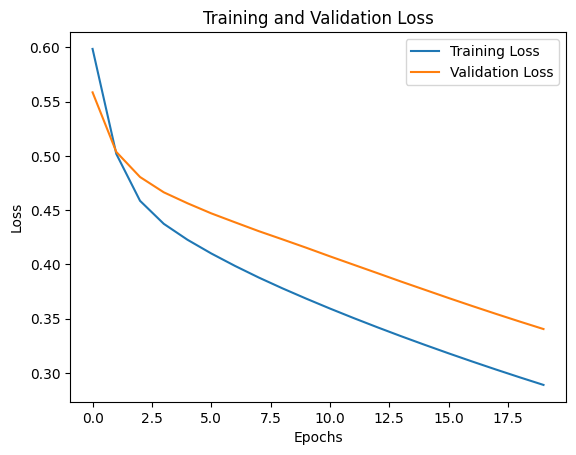

In [93]:
plot_scracth(history)

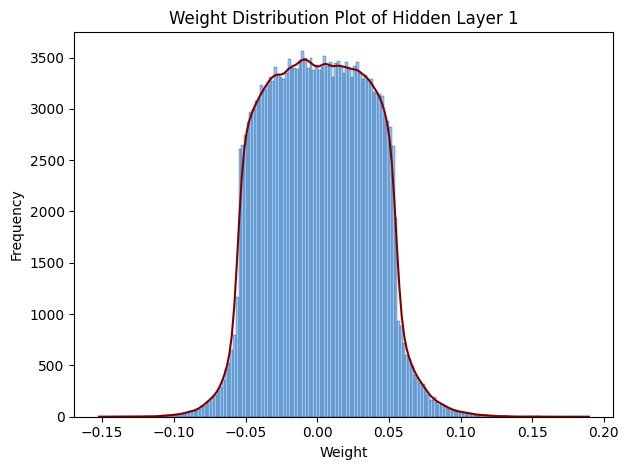

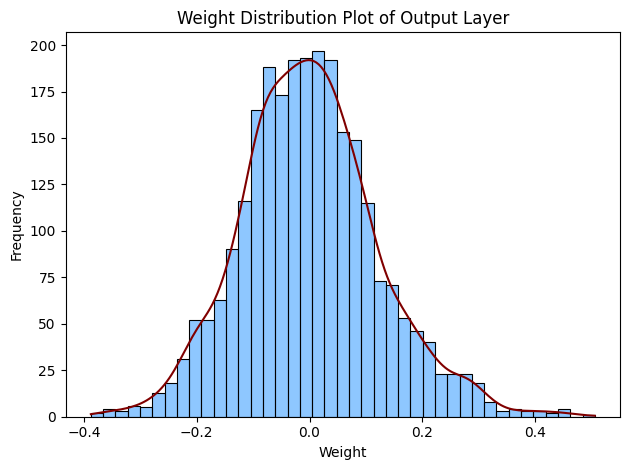

In [94]:
model.plot_weights([1, 2])

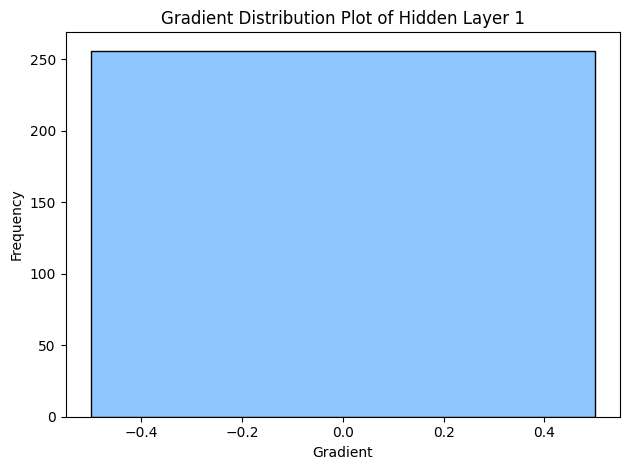

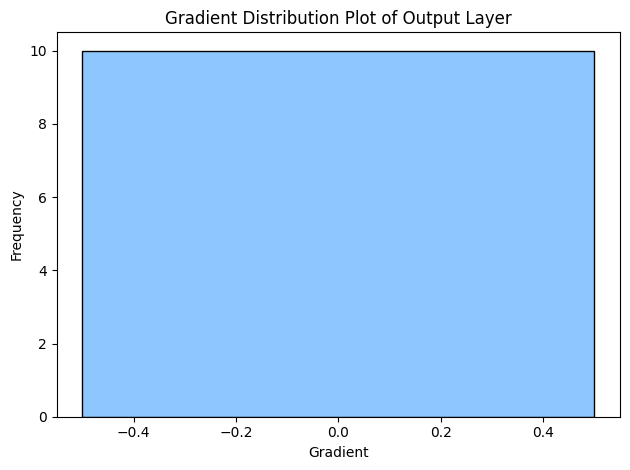

In [95]:
model.plot_gradients([1, 2])

### **Pengaruh Normalisasi**

In [75]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy")

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.1939
Validation Loss: 0.1330
--------------------
Epoch 2/20                              
Training Loss: 0.0893
Validation Loss: 0.0949
--------------------
Epoch 3/20                              
Training Loss: 0.0492
Validation Loss: 0.0804
--------------------
Epoch 4/20                              
Training Loss: 0.0353
Validation Loss: 0.0733
--------------------
Epoch 5/20                              
Training Loss: 0.0268
Validation Loss: 0.0699
--------------------
Epoch 6/20                              
Training Loss: 0.0208
Validation Loss: 0.0678
--------------------
Epoch 7/20                              
Training Loss: 0.0162
Validation Loss: 0.0666
--------------------
Epoch 8/20                              
Training Loss: 0.0126
Validation Loss: 0.0663
--------------------
Epoch 9/20                              
Training Loss: 0.0101
Validation Loss: 0.0658
--------------------
Epoch 10/20                 

In [76]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0593, Accuracy: 0.8300


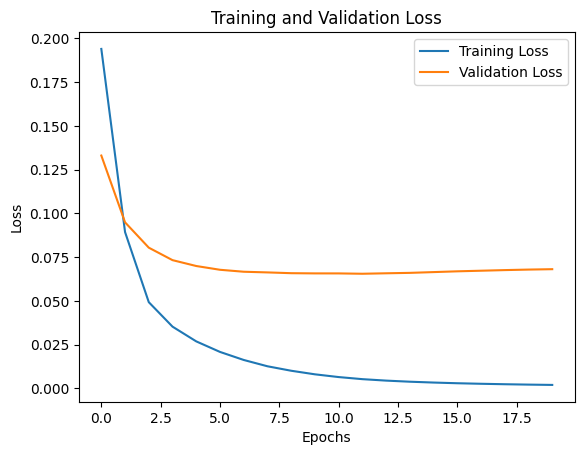

In [77]:
plot_scracth(history)

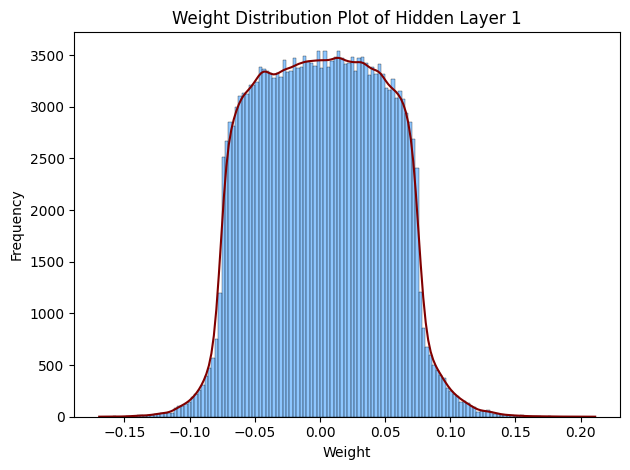

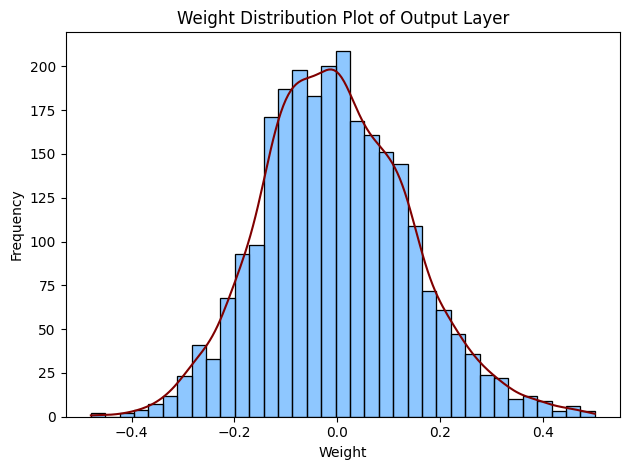

In [78]:
model.plot_weights([1, 2])

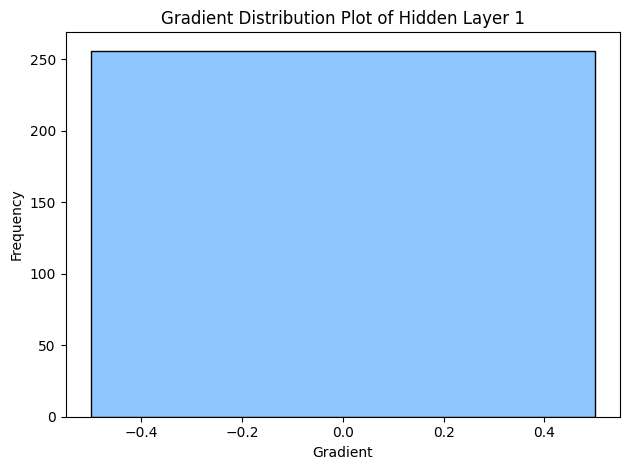

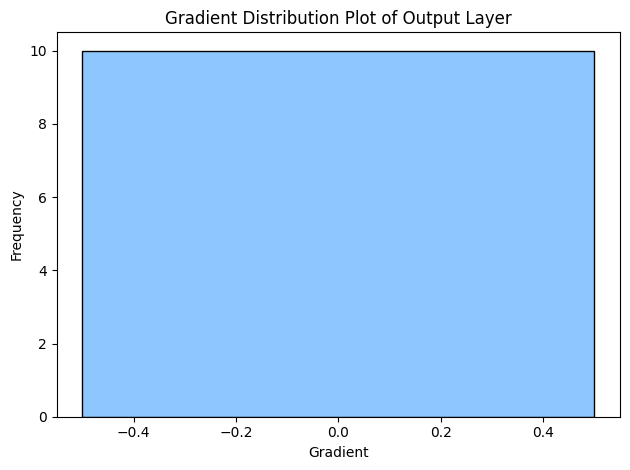

In [79]:
model.plot_gradients([1, 2])

In [ ]:
model = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model.compile(optimizer="sgd", loss="categorical_crossentropy", normalize=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.3035
Validation Loss: 0.1679
--------------------
Epoch 2/20                              
Training Loss: 0.0737
Validation Loss: 0.0842
--------------------
Epoch 3/20                              
Training Loss: 0.0422
Validation Loss: 0.0792
--------------------
Epoch 4/20                              
Training Loss: 0.0289
Validation Loss: 0.0798
--------------------
Epoch 5/20                              
Training Loss: 0.0214
Validation Loss: 0.0805
--------------------
Epoch 6/20                              
Training Loss: 0.0164
Validation Loss: 0.0807
--------------------
Epoch 7/20                              
Training Loss: 0.0130
Validation Loss: 0.0807
--------------------
Epoch 8/20                              
Training Loss: 0.0108
Validation Loss: 0.0807
--------------------
Epoch 9/20                              
Training Loss: 0.0093
Validation Loss: 0.0807
--------------------
Epoch 10/20                 

[(np.float64(0.3034686776626745), np.float64(0.16790362195645345)),
 (np.float64(0.07369373509392865), np.float64(0.08422018732855045)),
 (np.float64(0.04218224043826328), np.float64(0.07922738589328666)),
 (np.float64(0.028906224723414625), np.float64(0.07975957252388464)),
 (np.float64(0.021368252785852818), np.float64(0.0804755829647616)),
 (np.float64(0.016389647084361938), np.float64(0.08067732397332014)),
 (np.float64(0.013046552802270898), np.float64(0.0807121380151108)),
 (np.float64(0.010843028541377555), np.float64(0.08067174854100073)),
 (np.float64(0.009256652303620794), np.float64(0.080653772936666)),
 (np.float64(0.008082772318879612), np.float64(0.08068250738866327)),
 (np.float64(0.007200102758383968), np.float64(0.08076105934129793)),
 (np.float64(0.006513400067628485), np.float64(0.08088553723375343)),
 (np.float64(0.005958748773410065), np.float64(0.0810575083212935)),
 (np.float64(0.005496626241565179), np.float64(0.08128159227415112)),
 (np.float64(0.00510246163416

In [81]:
loss, metric = model.evaluate(X_test, y_test)

Loss: 0.0582, Accuracy: 0.8400


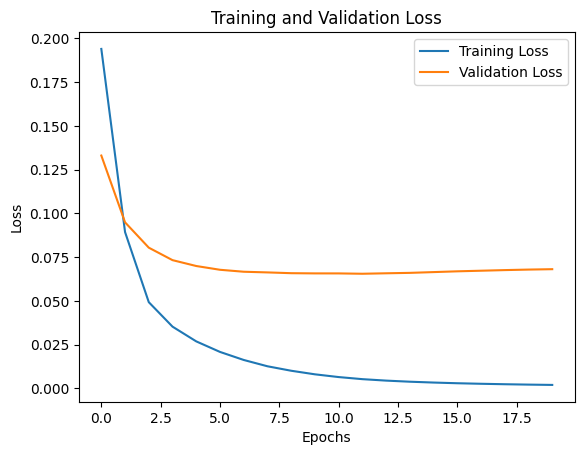

In [82]:
plot_scracth(history)

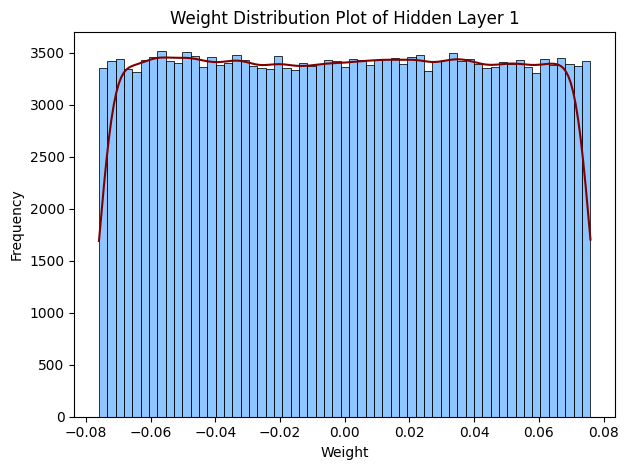

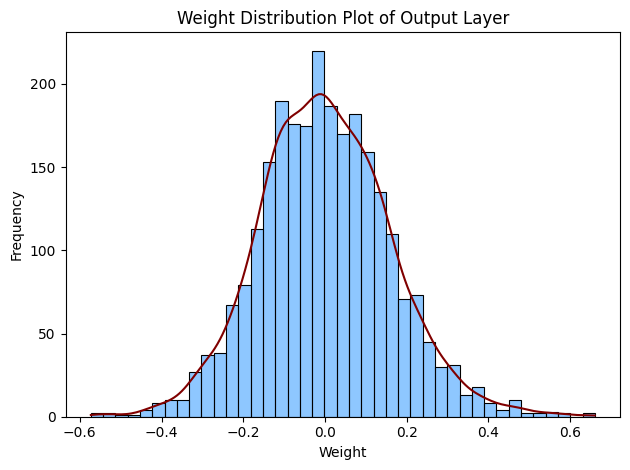

In [83]:
model.plot_weights([1, 2])

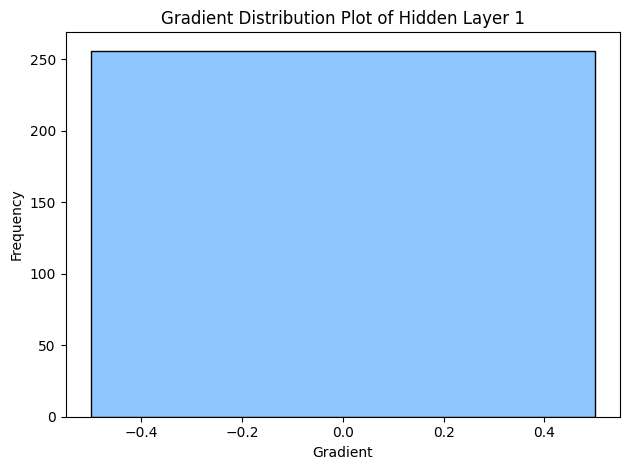

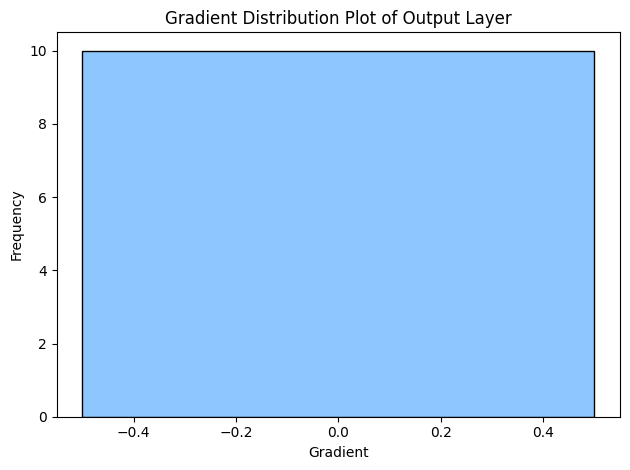

In [84]:
model.plot_gradients([1, 2])

### **Perbandingan dengan SKLearn**

In [85]:
model_scratch = FFNN([
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform", input_size=784),
    Dense(neuron_size=256, activation="relu", kernel_initializer="glorot_uniform"),
    Dense(neuron_size=10, activation="softmax", kernel_initializer="glorot_uniform")
])

model_scratch.compile(optimizer='sgd', loss="categorical_crossentropy")

model_scratch.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20                              
Training Loss: 0.2106
Validation Loss: 0.1921
--------------------
Epoch 2/20                              
Training Loss: 0.1623
Validation Loss: 0.1372
--------------------
Epoch 3/20                              
Training Loss: 0.1139
Validation Loss: 0.1310
--------------------
Epoch 4/20                              
Training Loss: 0.0729
Validation Loss: 0.1407
--------------------
Epoch 5/20                              
Training Loss: 0.0587
Validation Loss: 0.0947
--------------------
Epoch 6/20                              
Training Loss: 0.0373
Validation Loss: 0.0928
--------------------
Epoch 7/20                              
Training Loss: 0.0370
Validation Loss: 0.0834
--------------------
Epoch 8/20                              
Training Loss: 0.0244
Validation Loss: 0.0893
--------------------
Epoch 9/20                              
Training Loss: 0.0149
Validation Loss: 0.1095
--------------------
Epoch 10/20                 

[(np.float64(0.2105881423164606), np.float64(0.19214128871187602)),
 (np.float64(0.16230633140798628), np.float64(0.13722685922880173)),
 (np.float64(0.11385190143020422), np.float64(0.13102922813820544)),
 (np.float64(0.07289859306334444), np.float64(0.14074872762160032)),
 (np.float64(0.058740441233256925), np.float64(0.09468791854563006)),
 (np.float64(0.037319839094456284), np.float64(0.09281984547033272)),
 (np.float64(0.037020649963693794), np.float64(0.08344595962510831)),
 (np.float64(0.024443790529603354), np.float64(0.08931475964124709)),
 (np.float64(0.01485286168864661), np.float64(0.10953296981996294)),
 (np.float64(0.009533572948520794), np.float64(0.092416468597432)),
 (np.float64(0.01655271966084275), np.float64(0.10348646786913133)),
 (np.float64(0.006645040191651377), np.float64(0.09515633388275634)),
 (np.float64(0.0035594991406798647), np.float64(0.09410096903496315)),
 (np.float64(0.0025085332062875286), np.float64(0.09777524855850189)),
 (np.float64(0.001999710837

In [86]:
loss, metric = model_scratch.evaluate(X_test, y_test)

Loss: 0.0708, Accuracy: 0.8450


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense as Ds

In [88]:
model_sklearn = Sequential()
model_sklearn.add(Ds(256, input_dim=784, activation='relu', kernel_initializer='glorot_uniform'))
model_sklearn.add(Ds(256, activation='relu', kernel_initializer='glorot_uniform'))
model_sklearn.add(Ds(10, activation='softmax', kernel_initializer='glorot_uniform'))

model_sklearn.compile(loss="categorical_crossentropy", optimizer='SGD', metrics=['accuracy'])

model_sklearn.fit(X_train, y_train, epochs=20, batch_size=20, verbose=True, validation_data=(X_val, y_val))

Epoch 1/20


C:\Users\Zaki\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1278 - loss: 2.3507 - val_accuracy: 0.2200 - val_loss: 2.2123
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2584 - loss: 2.1973 - val_accuracy: 0.4100 - val_loss: 2.1077
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4268 - loss: 2.0839 - val_accuracy: 0.5100 - val_loss: 2.0066
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4983 - loss: 1.9592 - val_accuracy: 0.5200 - val_loss: 1.9035
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6018 - loss: 1.8480 - val_accuracy: 0.5700 - val_loss: 1.7926
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7017 - loss: 1.7167 - val_accuracy: 0.6600 - val_loss: 1.6782
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7113 - loss: 1.6118 - val_accuracy: 0.6800 - val_loss: 1.5637
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 1.4909 - val_accuracy: 0.6800 - val_loss: 1.4574
Ep

In [89]:
loss, metric = model_sklearn.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8224 - loss: 0.7397  
